# <center><strong>Obesity risk</strong></center>

###### **By Mohamed Jamyl**

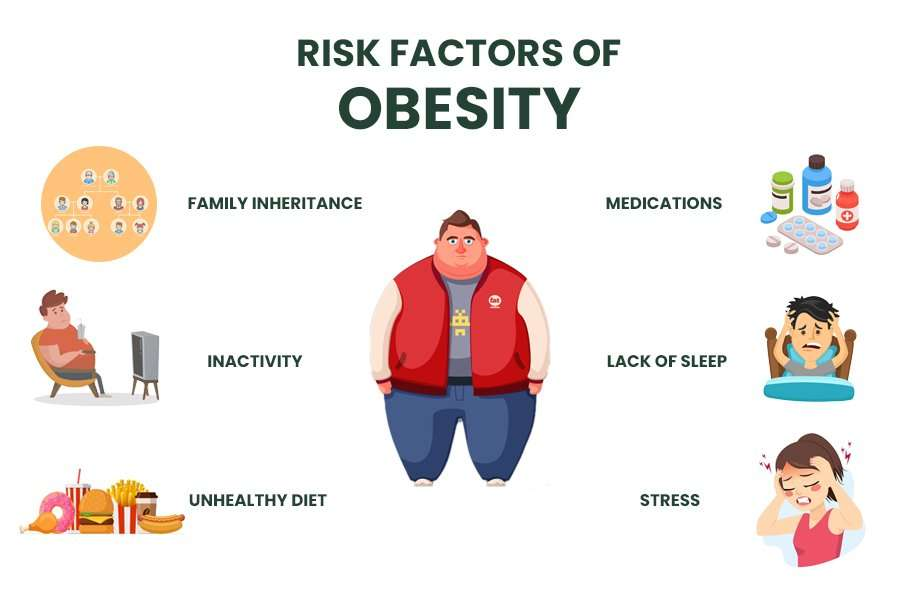

In [1]:
from IPython.display import Image
Image(filename='obe.jpg')

## <center><strong>Project Overview </strong></center>

### This Kaggle dataset provides comprehensive information on individuals, encompassing key attributes such as gender, age, height, weight, family history with overweight, dietary habits, physical activity, transportation mode, and the corresponding obesity level. The dataset is meticulously curated for research and analysis in the domain of health and lifestyle studies.nting obesity level)

--------------------------------------
--------------------------------------
--------------------------------------

## **Import Libraries**

-------------------------

In [2]:
from pandas import read_csv, concat
from matplotlib.pyplot import show, suptitle, subplots_adjust, tight_layout, subplots
from matplotlib.pyplot import figure, title, xlabel, ylabel, grid, tight_layout
from numpy import log, inf
from seaborn import kdeplot, heatmap, boxplot, regplot, countplot, histplot

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import classification_report

from pickle import dump


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


--------------------------------
--------------------------------
-------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

------------------------

In [3]:
train_df= read_csv('train_obesity.csv')

In [4]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train_df.sample(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
4422,4422,Female,20.000000,1.870000,66.000000,no,yes,3.000000,4.0,Frequently,yes,3.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
19315,19315,Female,21.000000,1.660000,58.000000,no,yes,1.000000,1.0,Always,no,1.000000,no,2.000000,1.000000,no,Public_Transportation,Normal_Weight
4627,4627,Male,23.745833,1.750000,119.484614,yes,yes,1.631144,3.0,Sometimes,no,2.000000,no,0.889963,0.167790,Sometimes,Public_Transportation,Obesity_Type_II
11802,11802,Female,26.000000,1.633195,111.883747,yes,yes,3.000000,3.0,Sometimes,no,1.640539,no,0.000000,0.140368,Sometimes,Public_Transportation,Obesity_Type_III
4772,4772,Male,18.011903,1.771817,51.598593,yes,yes,1.889199,3.0,Sometimes,no,2.000000,no,1.201403,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
7747,7747,Male,30.642430,1.763029,118.780099,yes,yes,2.958410,3.0,Sometimes,no,2.357373,no,0.597863,0.000000,Sometimes,Automobile,Obesity_Type_II
6094,6094,Female,21.000000,1.590000,48.000000,yes,yes,2.000000,3.0,Sometimes,no,1.000000,no,0.000000,2.000000,Sometimes,Public_Transportation,Normal_Weight
13059,13059,Male,26.000000,1.817480,85.000000,yes,yes,3.000000,3.0,Sometimes,no,2.825629,no,1.000000,0.122280,Sometimes,Automobile,Overweight_Level_I
7830,7830,Male,22.000000,1.740000,66.000000,yes,no,2.000000,3.0,Sometimes,no,3.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
9849,9849,Male,31.755387,1.750000,119.205308,yes,yes,2.219650,3.0,Sometimes,no,2.165408,no,0.973864,0.000000,Sometimes,Automobile,Obesity_Type_II


In [6]:
train_df.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [7]:
train_df.shape

(20758, 18)

In [8]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
train_df.rename(columns={'FAVC': 'Frequent consumption of high-caloric food', 
                         'family_history_with_overweight':'Family history with overweight',
                         'FCVC': 'Frequency of vegetable consumption',
                         'NCP':'Number of main meals the person eats per day', 
                         'CAEC':'Consumption of food between meals', 
                         'CH2O':'Daily water consumption', 
                         'SCC':'Whether the person takes calorie supplements', 
                         'FAF':'Physical activity frequency', 
                         'TUE':'Time spent using technology', 
                         'CALC':'Alcohol consumption', 
                         'MTRANS':'Means of transportation used',
                         'NObeyesdad':'Obesity level class' } ,inplace=True)

In [10]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'Family history with overweight',
       'Frequent consumption of high-caloric food',
       'Frequency of vegetable consumption',
       'Number of main meals the person eats per day',
       'Consumption of food between meals', 'SMOKE', 'Daily water consumption',
       'Whether the person takes calorie supplements',
       'Physical activity frequency', 'Time spent using technology',
       'Alcohol consumption', 'Means of transportation used',
       'Obesity level class'],
      dtype='object')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20758 non-null  int64  
 1   Gender                                        20758 non-null  object 
 2   Age                                           20758 non-null  float64
 3   Height                                        20758 non-null  float64
 4   Weight                                        20758 non-null  float64
 5   Family history with overweight                20758 non-null  object 
 6   Frequent consumption of high-caloric food     20758 non-null  object 
 7   Frequency of vegetable consumption            20758 non-null  float64
 8   Number of main meals the person eats per day  20758 non-null  float64
 9   Consumption of food between meals             20758 non-null 

In [12]:
train_df.isnull().sum()

id                                              0
Gender                                          0
Age                                             0
Height                                          0
Weight                                          0
Family history with overweight                  0
Frequent consumption of high-caloric food       0
Frequency of vegetable consumption              0
Number of main meals the person eats per day    0
Consumption of food between meals               0
SMOKE                                           0
Daily water consumption                         0
Whether the person takes calorie supplements    0
Physical activity frequency                     0
Time spent using technology                     0
Alcohol consumption                             0
Means of transportation used                    0
Obesity level class                             0
dtype: int64

In [13]:
train_df.duplicated().sum()

0

In [14]:
train_df = train_df.drop('id',axis=1)

----------------------------
----------------------------
----------------------------

### **Basic Statistical Overview**

-------------------------

- Summary Statistical : **describe()**

In [15]:
train_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
Frequency of vegetable consumption,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
Number of main meals the person eats per day,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
Daily water consumption,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
Physical activity frequency,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
Time spent using technology,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [16]:
train_df.select_dtypes(include='object').describe()

,Gender,Family history with overweight,Frequent consumption of high-caloric food,Consumption of food between meals,SMOKE,Whether the person takes calorie supplements,Alcohol consumption,Means of transportation used,Obesity level class
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


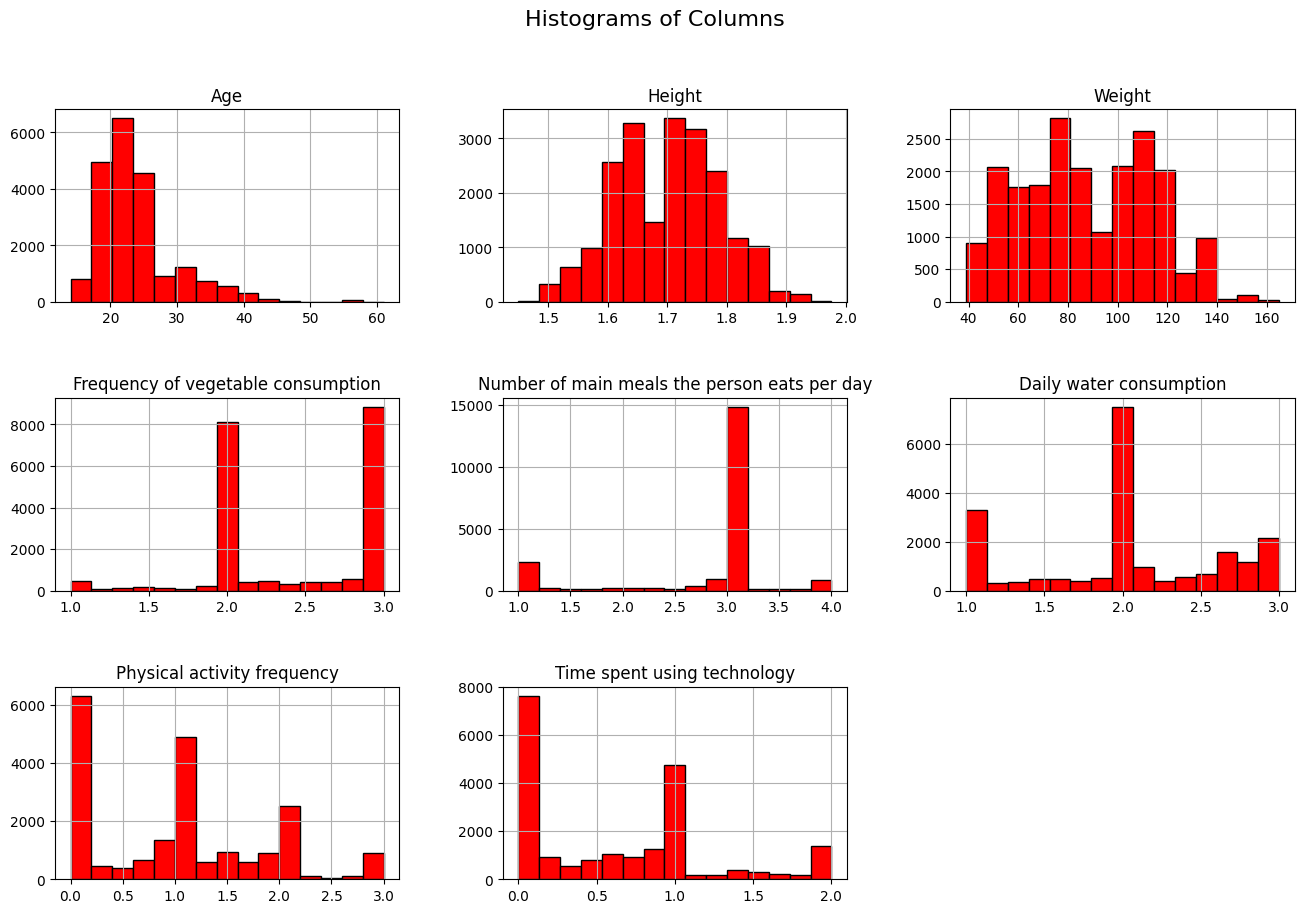

In [17]:
train_df.hist(bins=15, figsize=(16, 10), color='red', edgecolor='black')
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)  
show()

----------------------------

- Summary Statistical : **value_counts()**

In [18]:
train_df['Gender'].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\1882997978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=train_df, palette=['green','red'])


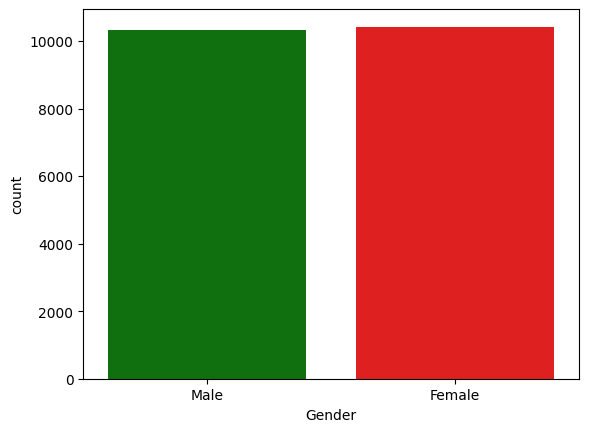

In [19]:
countplot(x='Gender', data=train_df, palette=['green','red'])
xlabel('Gender')
show()

--------------------------

In [20]:
train_df['Family history with overweight'].value_counts()

Family history with overweight
yes    17014
no      3744
Name: count, dtype: int64

---------------------

In [21]:
train_df['Frequent consumption of high-caloric food'].value_counts()

Frequent consumption of high-caloric food
yes    18982
no      1776
Name: count, dtype: int64

-----------------------

In [22]:
train_df['Consumption of food between meals'].value_counts()

Consumption of food between meals
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

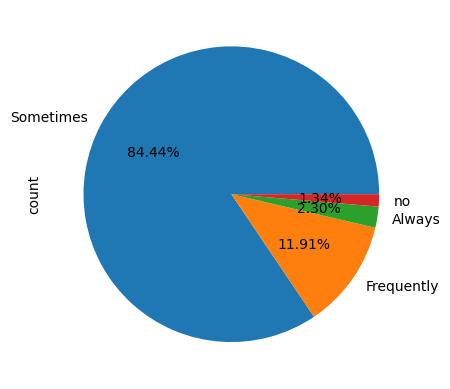

In [23]:
train_df['Consumption of food between meals'].value_counts().plot.pie(autopct='%0.2f%%')
show()

--------------------------

In [24]:
train_df['SMOKE'].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

---------------------

In [25]:
train_df['Whether the person takes calorie supplements'].value_counts()

Whether the person takes calorie supplements
no     20071
yes      687
Name: count, dtype: int64

---------------------------

In [26]:
train_df['Alcohol consumption'].value_counts()

Alcohol consumption
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

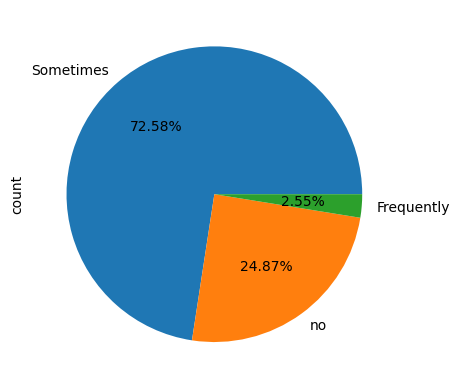

In [27]:
train_df['Alcohol consumption'].value_counts().plot.pie(autopct='%0.2f%%')
show()

-----------------------------

In [28]:
train_df['Means of transportation used'].value_counts()

Means of transportation used
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

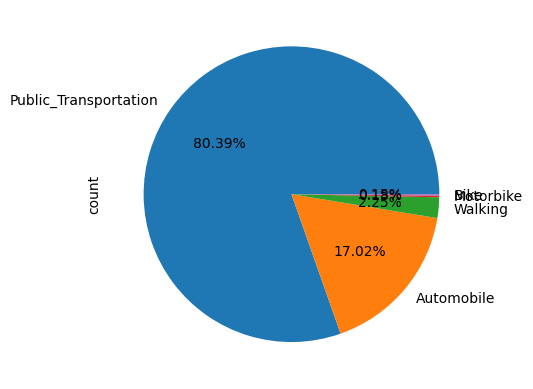

In [29]:
train_df['Means of transportation used'].value_counts().plot.pie(autopct='%0.2f%%')
show()

-------------------------

In [30]:
train_df['Obesity level class'].value_counts()

Obesity level class
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

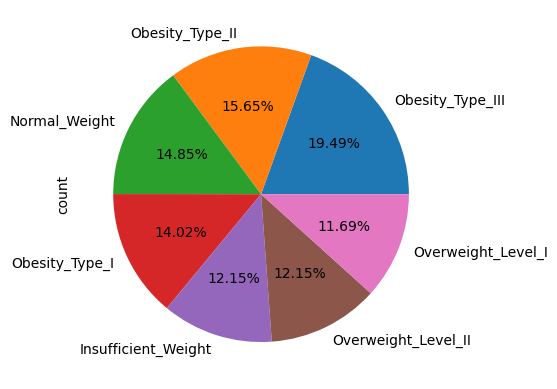

In [31]:
train_df['Obesity level class'].value_counts().plot.pie(autopct='%0.2f%%')
show()

--------------------------------
------------------------------

## **Distribution of Variables**

------------------------

- **Numerical Features (KDE)**

In [32]:
train_df

,Gender,Age,Height,Weight,Family history with overweight,Frequent consumption of high-caloric food,Frequency of vegetable consumption,Number of main meals the person eats per day,Consumption of food between meals,SMOKE,Daily water consumption,Whether the person takes calorie supplements,Physical activity frequency,Time spent using technology,Alcohol consumption,Means of transportation used,Obesity level class
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


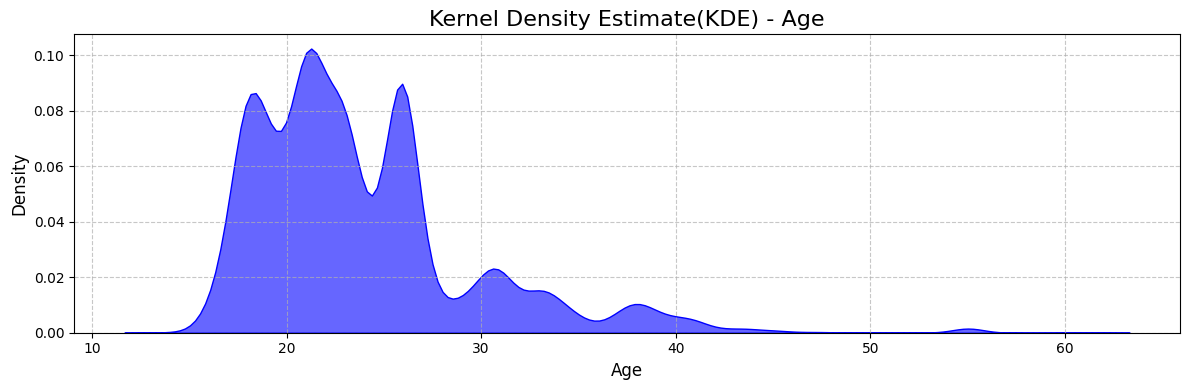

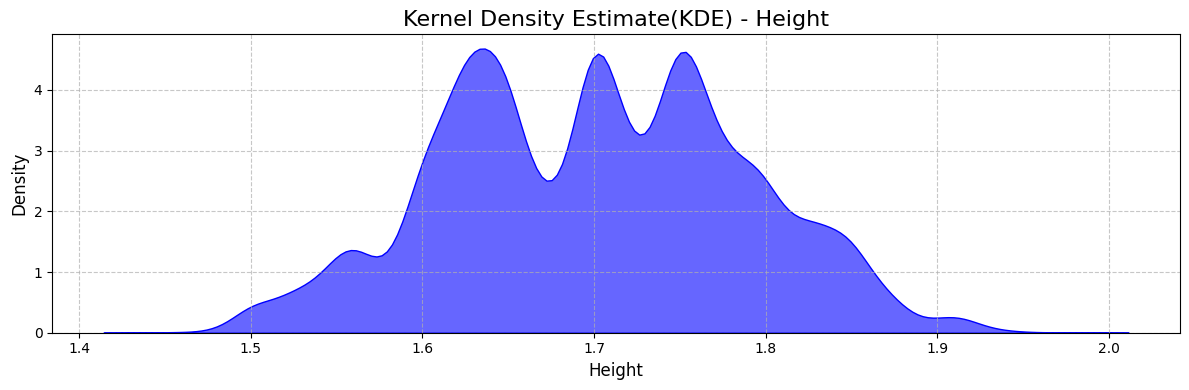

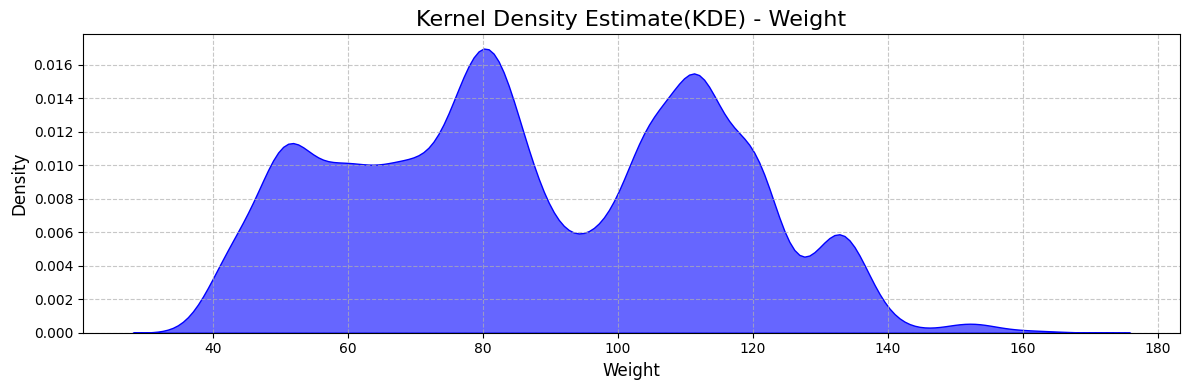

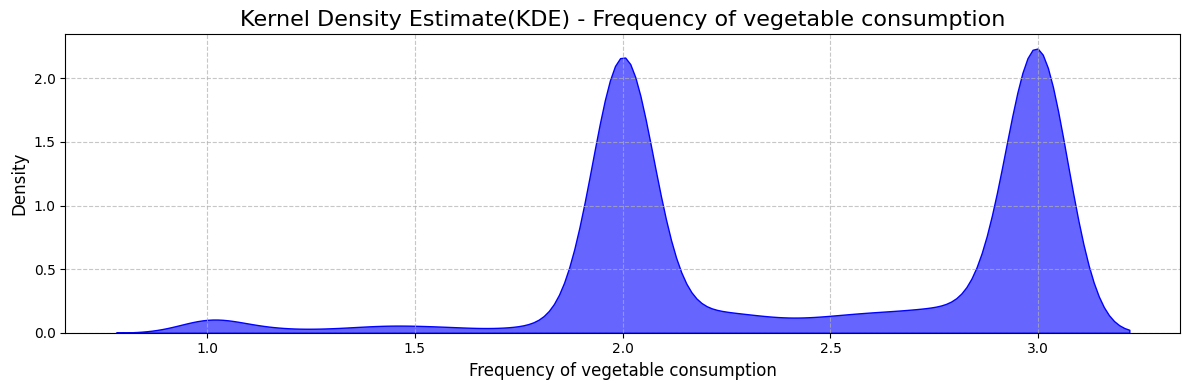

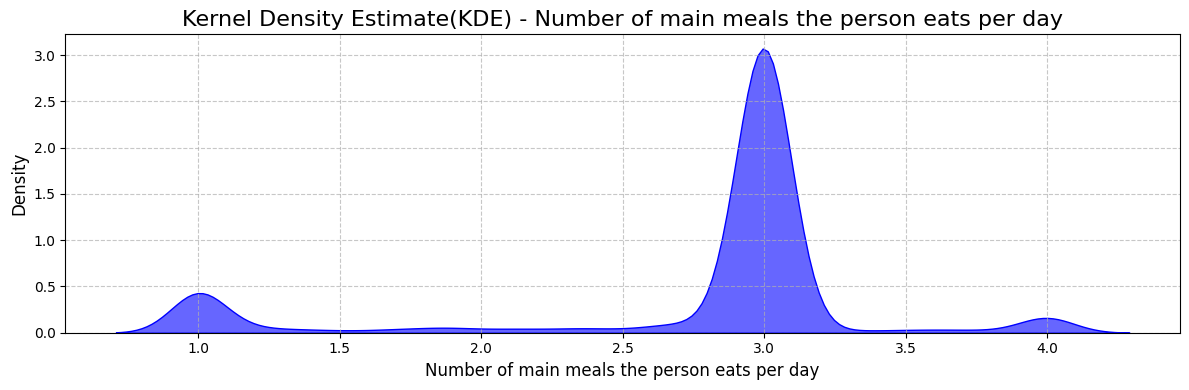

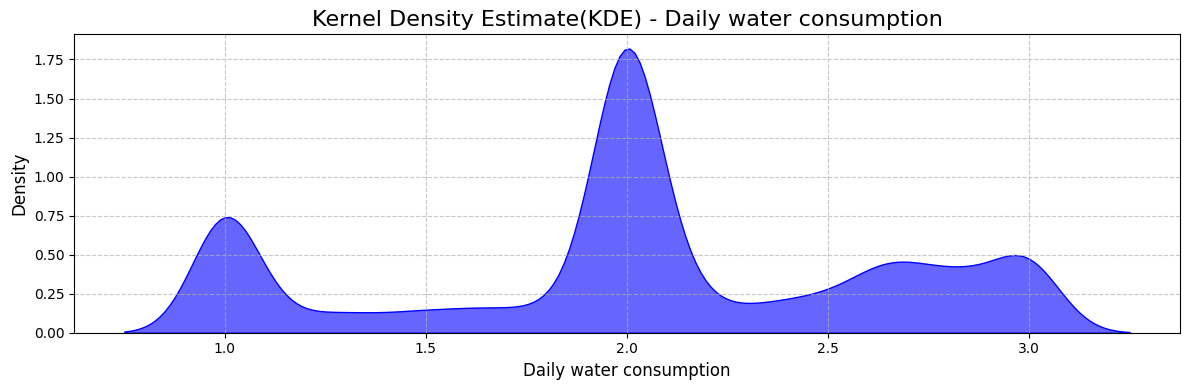

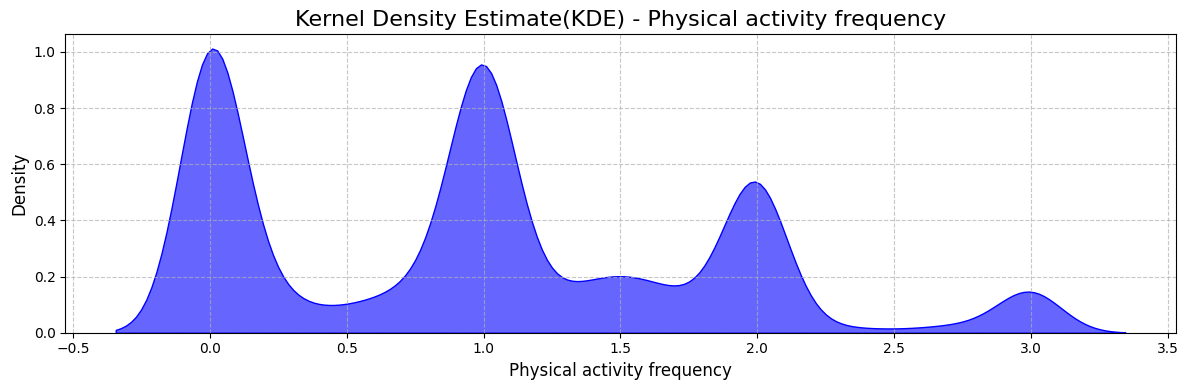

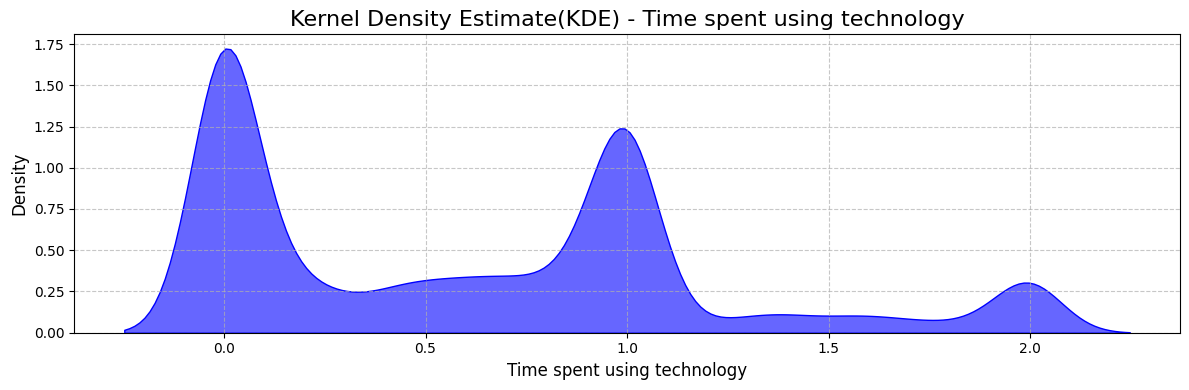

In [33]:
for	col	in train_df.select_dtypes('number').columns:
    figure(figsize=(12,	4))
    kdeplot(train_df[col], fill=True,	color='blue', alpha=0.6)
    title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
    xlabel(col,	fontsize=12)
    ylabel('Density', fontsize=12)
    grid(True, linestyle='--', alpha=0.7)
    tight_layout()
    show()

------------------------

### **Correlation**

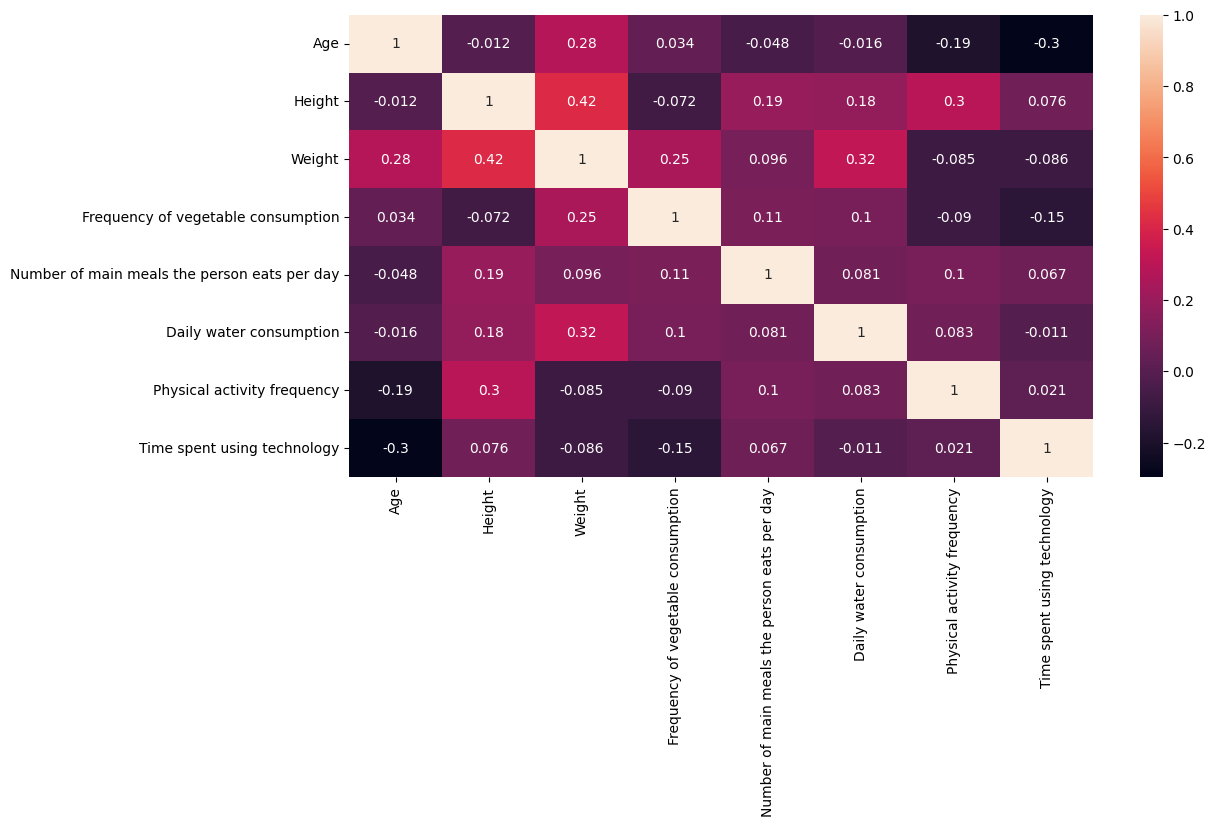

In [34]:
figure(figsize=(12,	6))
heatmap(train_df.select_dtypes(include='number').corr(), annot=True)
show()

##### There is a high negative correlation (-0.3) between **Age** and **Time spent using technology**

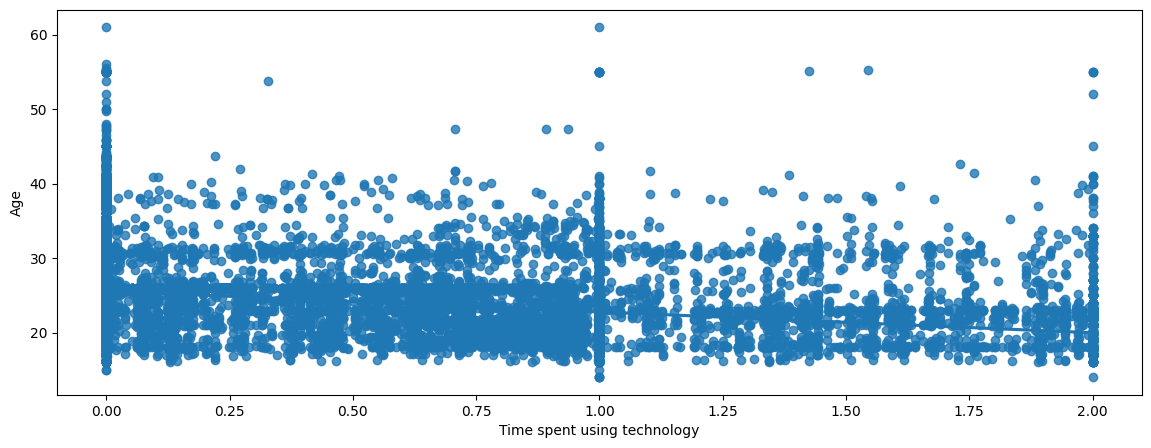

In [35]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="Time spent using technology", y="Age", data=train_df,ax=ax)
show()

------------------------------
-----------------------------

## **Feature Extraction**

-------------------------

In [36]:
train_df['Frequency of vegetable consumption'].value_counts()

Frequency of vegetable consumption
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.443674       1
1.111887       1
1.595746       1
2.577427       1
2.731368       1
Name: count, Length: 934, dtype: int64

##### Transform values in column **Frequency of vegetable consumption** with **round()** function

In [37]:
train_df['Frequency of vegetable consumption'] = train_df['Frequency of vegetable consumption'].apply(lambda x : round(x))

In [38]:
train_df['Frequency of vegetable consumption'].value_counts()

Frequency of vegetable consumption
3    10092
2     9911
1      755
Name: count, dtype: int64

#### Extracting new column **[Frequency of vegetable consumption Classes]** from **[Frequency of vegetable consumption]**

In [39]:
def fcvc(m):
    m = int(m)
    if m == 1:
        return 'Rarely consumes vegetables'
    if m == 2:
        return 'Sometimes consumes vegetables'
    if m == 3:
        return 'Regularly consumes vegetables'

train_df['Frequency of vegetable consumption Classes'] = train_df['Frequency of vegetable consumption'].apply(lambda x : fcvc(x))

In [40]:
train_df['Frequency of vegetable consumption Classes'].value_counts()

Frequency of vegetable consumption Classes
Regularly consumes vegetables    10092
Sometimes consumes vegetables     9911
Rarely consumes vegetables         755
Name: count, dtype: int64

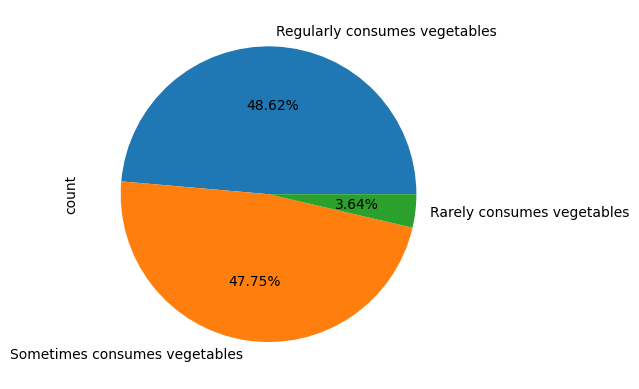

In [41]:
train_df['Frequency of vegetable consumption Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

-------------------------------

In [42]:
train_df['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
3.608850        1
1.193486        1
2.737620        1
3.019574        1
2.256119        1
Name: count, Length: 689, dtype: int64

##### Transform values in column **Number of main meals the person eats per day** with **round()** function

In [43]:
train_df['Number of main meals the person eats per day'] = train_df['Number of main meals the person eats per day'].apply(lambda x : round(x))

In [44]:
train_df['Number of main meals the person eats per day'] = train_df['Number of main meals the person eats per day'].astype(int)

In [45]:
train_df['Number of main meals the person eats per day'].unique()

array([3, 1, 2, 4])

In [46]:
train_df['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3    16309
1     2510
4     1040
2      899
Name: count, dtype: int64

#### Extracting new column **[Number of main meals the person eats per day Classes]** from **[Number of main meals the person eats per day]**

In [47]:
def fncp(m):
    m = int(m)
    if m == 1:
        return 'One meal per day'
    if m == 2:
        return 'Two meals per day'
    if m == 3:
        return 'Three meals per day'
    if m == 4:
        return 'More than three meals'

train_df['Number of main meals the person eats per day Classes'] = train_df['Number of main meals the person eats per day'].apply(lambda x : fncp(x))

In [48]:
train_df['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
Three meals per day      16309
One meal per day          2510
More than three meals     1040
Two meals per day          899
Name: count, dtype: int64

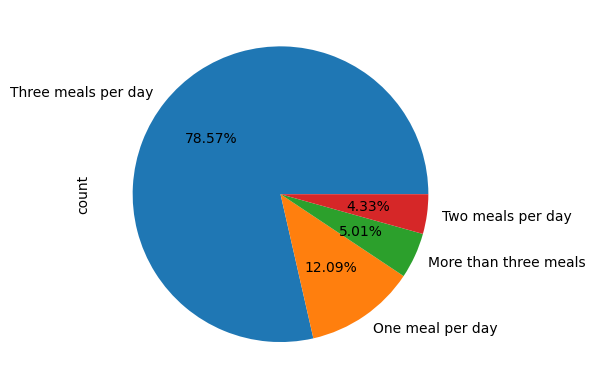

In [49]:
train_df['Number of main meals the person eats per day Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

------------------------

#### Extracting new column **[Daily water consumption Classes]** from **[Daily water consumption]**

In [50]:
train_df['Daily water consumption'].value_counts()

Daily water consumption
2.000000    6616
1.000000    2799
3.000000    1571
2.825629      77
2.868167      60
            ... 
2.835195       1
2.632983       1
2.090213       1
2.756916       1
1.365188       1
Name: count, Length: 1506, dtype: int64

In [51]:
def fncp(m):
    m = int(m)
    if m <= 1:
        return 'Low water intake'
    elif m <= 2:
        return 'Moderate water intake'
    if m > 2:
        return 'High water intake'

train_df['Daily water consumption Classes'] = train_df['Daily water consumption'].apply(lambda x : fncp(x))

In [52]:
train_df['Daily water consumption Classes'].value_counts()

Daily water consumption Classes
Moderate water intake    13051
Low water intake          6136
High water intake         1571
Name: count, dtype: int64

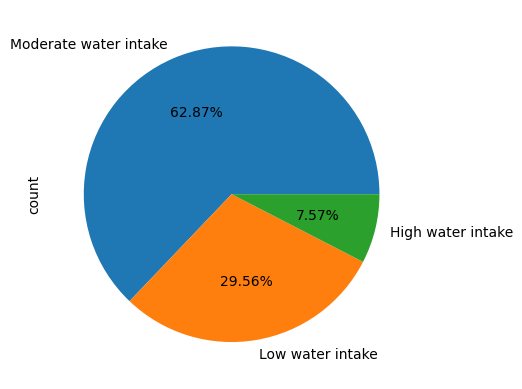

In [53]:
train_df['Daily water consumption Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

------------------------

#### Extracting new column **[Physical activity frequency Classes]** from **[Physical activity frequency]**

In [54]:
train_df['Physical activity frequency'].value_counts()

Physical activity frequency
0.000000    5044
1.000000    4097
2.000000    2391
3.000000     800
1.097905      56
            ... 
1.706287       1
0.675983       1
1.923607       1
1.320209       1
0.988668       1
Name: count, Length: 1360, dtype: int64

In [55]:
def fncp(m):
    m = int(m)
    if m == 0 :
        return 'No physical activity'
    elif m <= 1 :
        return 'Very low activity'
    elif m < 2.6 :
        return 'Low to moderate activity'
    else :
        return 'Moderate activity'

train_df['Physical activity frequency Classes'] = train_df['Physical activity frequency'].apply(lambda x : fncp(x))

In [56]:
train_df['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity        9191
Very low activity           7886
Low to moderate activity    2881
Moderate activity            800
Name: count, dtype: int64

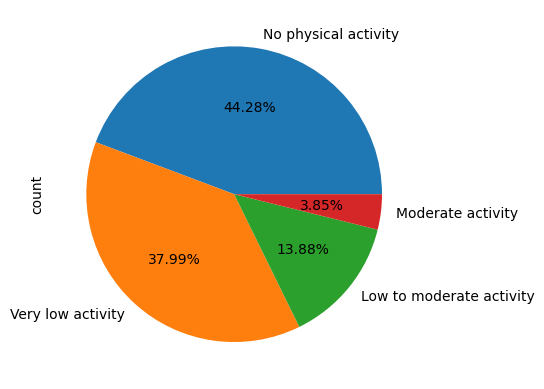

In [57]:
train_df['Physical activity frequency Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------

#### Extracting new column **[Time spent using technology Classes]** from **[Time spent using technology]**

In [58]:
train_df['Time spent using technology'].value_counts()

Time spent using technology
0.000000    6566
1.000000    4326
2.000000    1133
0.002600      78
0.723154      65
            ... 
1.223661       1
0.057868       1
0.236067       1
0.073088       1
0.768375       1
Name: count, Length: 1297, dtype: int64

In [59]:
def fncp(m):
    m = int(m)
    if m <= 1 :
        return 'Very low screen time'
    else :
        return 'Moderate screen time'

train_df['Time spent using technology Classes'] = train_df['Time spent using technology'].apply(lambda x : fncp(x))

In [60]:
train_df['Time spent using technology Classes'].value_counts()

Time spent using technology Classes
Very low screen time    19625
Moderate screen time     1133
Name: count, dtype: int64

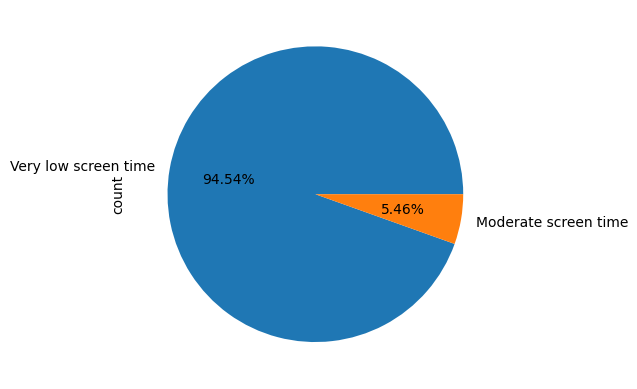

In [61]:
train_df['Time spent using technology Classes'].value_counts().plot.pie(autopct='%0.2f%%')
show()

------------------------

##### Transform values in column **Age** with **round()** function

In [62]:
train_df['Age']

0        24.443011
1        18.000000
2        18.000000
3        20.952737
4        31.641081
           ...    
20753    25.137087
20754    18.000000
20755    20.101026
20756    33.852953
20757    26.680376
Name: Age, Length: 20758, dtype: float64

In [63]:
train_df['Age'] = train_df['Age'].apply(lambda x : int(round(x)))
train_df['Age'] 

0        24
1        18
2        18
3        21
4        32
         ..
20753    25
20754    18
20755    20
20756    34
20757    27
Name: Age, Length: 20758, dtype: int64

In [64]:
# train_df.to_csv('Obesity risk (New data).csv',index=False)

-----------------------
-----------------------

## **Detect Outliers**

------------------------

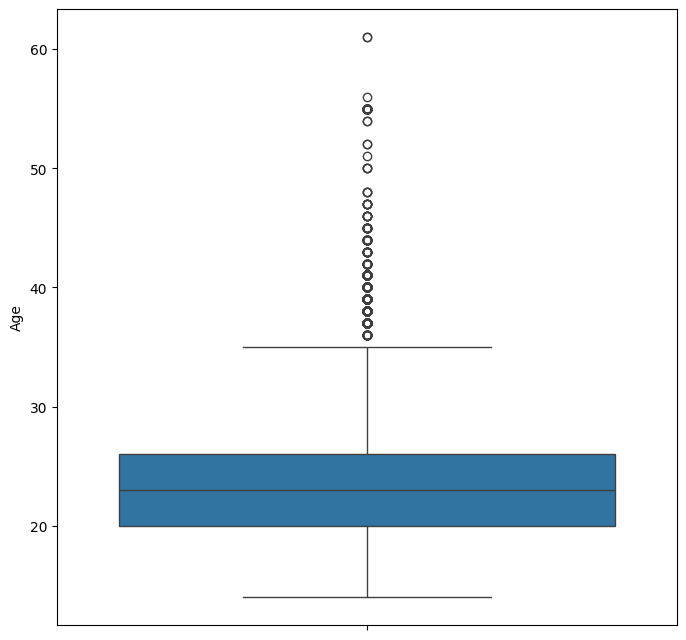

In [65]:
fig, axes = subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
boxplot(data = train_df, y = 'Age', orient="v", ax=axes)
show()

In [66]:
Q1=train_df['Age'].quantile(0.25)
Q3=train_df['Age'].quantile(0.75)
IQR = Q3-Q1

Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

outliers = ((train_df['Age']>Upper_bound)|(train_df['Age']<Lower_bound)).sum()
Total = train_df['Age'].shape[0]
print(f'Total of outliers in Age are : {outliers}--{round(100*(outliers)/Total,2)}%')
    
if outliers > 0:
    train_df=train_df.loc[(train_df['Age'] <= Upper_bound) & (train_df['Age'] >= Lower_bound)]

Total of outliers in Age are : 1029--4.96%


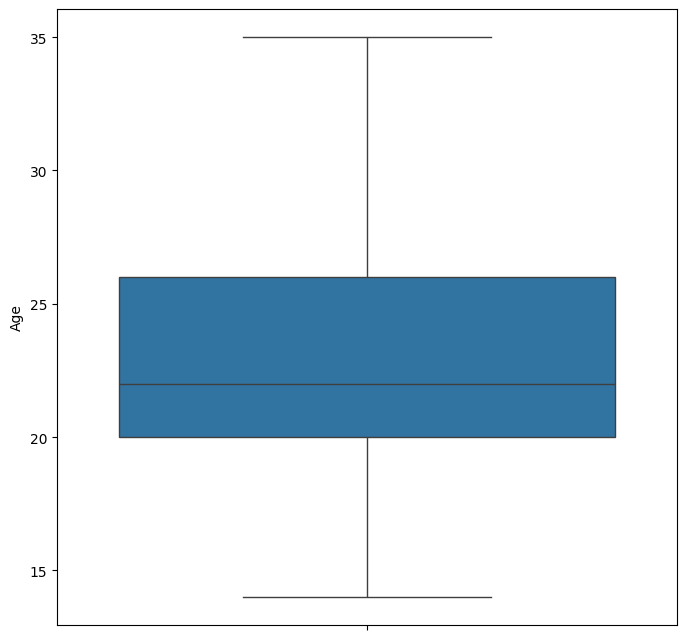

In [67]:
fig, axes = subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
boxplot(data = train_df, y = 'Age', orient="v", ax=axes)
show()

In [68]:
# train_df.to_csv('train data (New data).csv',index=False)

------------------------
------------------------

## **Analysis**

---------------------------

##### **Investigate relationships between Gender and Physical activity frequency Classes**

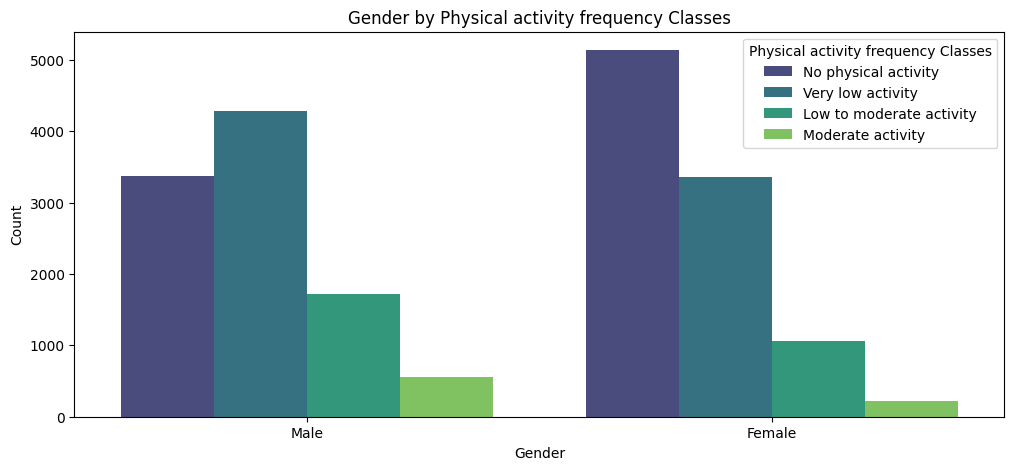

In [69]:
figure(figsize=(12,	5))
countplot(data=train_df, x='Gender', hue='Physical activity frequency Classes',	palette='viridis')
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
# plt.xticks(rotation=45)
ylabel('Count')
show()

------------------------

##### **Investigate relationships between Gender and Obesity level class**

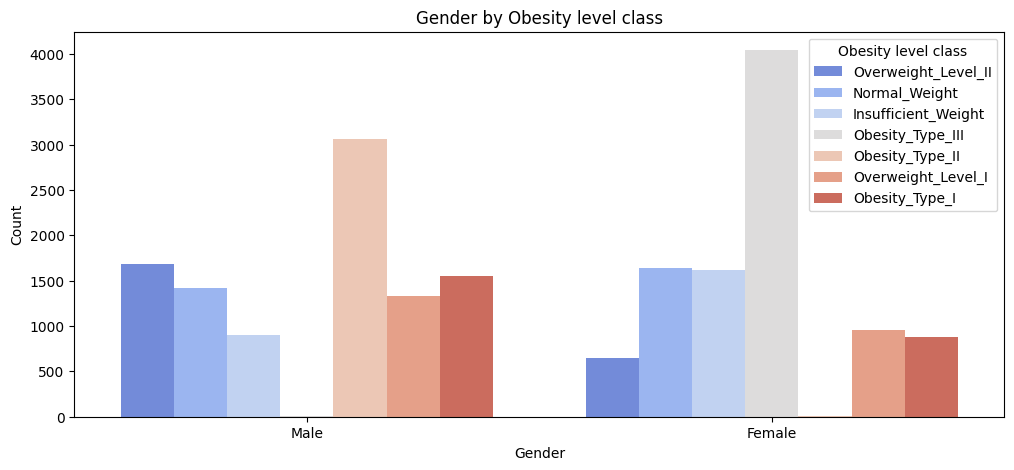

In [70]:
figure(figsize=(12, 5))
countplot(data=train_df, x='Gender', hue='Obesity level class', palette='coolwarm')
title('Gender by Obesity level class')
xlabel('Gender')
ylabel('Count')
show()

-------------------------

##### **Analyze weight distribution by Gender**

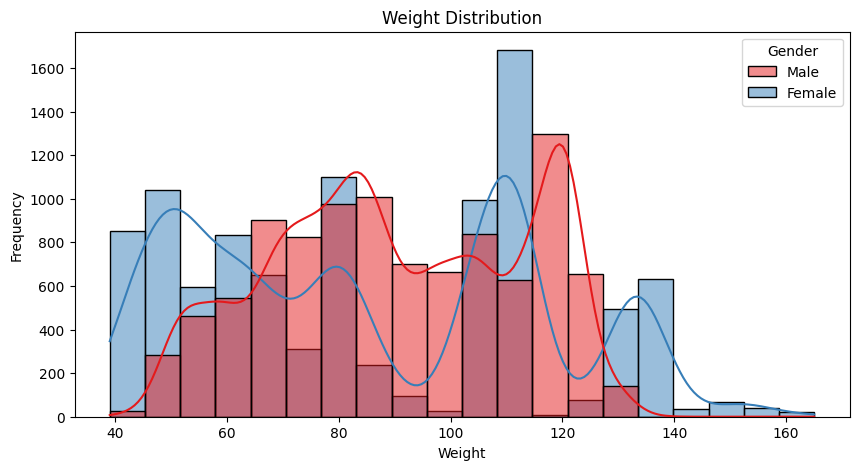

In [71]:
figure(figsize=(10, 5))
histplot(data=train_df,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set1')
title('Weight Distribution')
xlabel('Weight')
ylabel('Frequency')
show()

---------------------

##### **Analyze Height distribution by Gender**

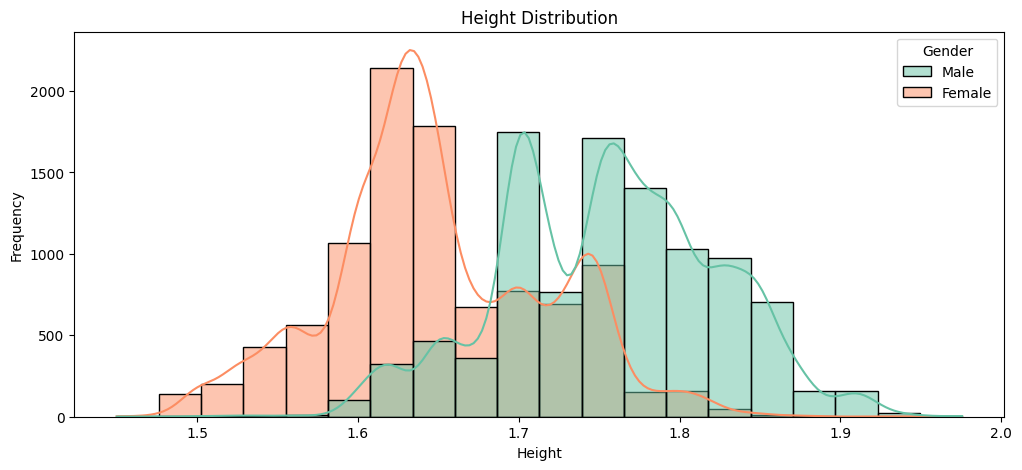

In [72]:
figure(figsize=(12, 5))
histplot(data=train_df,	x='Height',	hue='Gender', kde=True, bins=20, palette='Set2')
title('Height Distribution')
xlabel('Height')
ylabel('Frequency')
show()

-----------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90**

In [73]:
GenderGt30AndWeightGte90 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) , (['Age','Gender','Weight'])]

In [74]:
GenderGt30AndWeightGte90

,Age,Gender,Weight
4,32,Male,93.798055
46,31,Male,120.998266
102,31,Male,122.813033
103,32,Male,90.000000
203,35,Female,90.000000
...,...,...,...
20583,34,Male,91.059595
20598,31,Male,112.277567
20635,31,Male,120.919703
20710,34,Male,102.134646


In [75]:
GenderGt30AndWeightGte90['Age'].value_counts()

Age
31    550
32    160
33    154
34     68
35     29
Name: count, dtype: int64

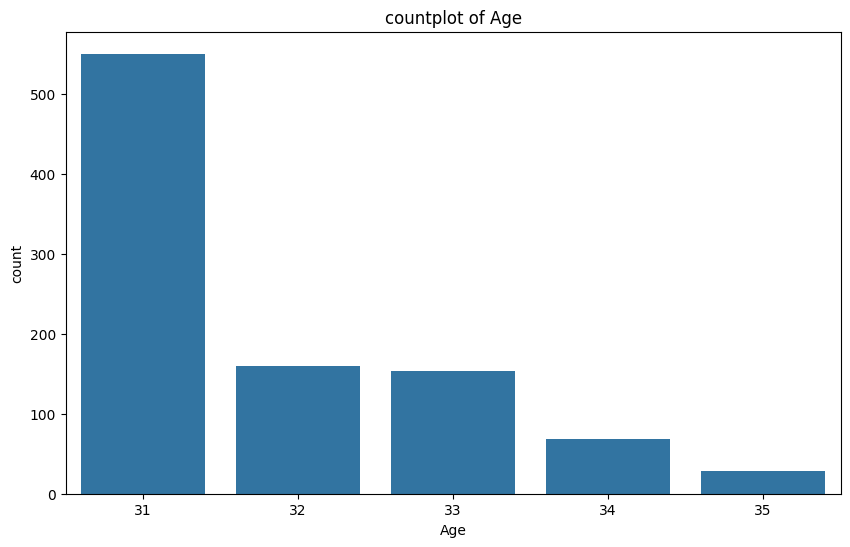

In [76]:
figure(figsize=(10, 6))
countplot(data = GenderGt30AndWeightGte90, x = 'Age', order = GenderGt30AndWeightGte90['Age'].value_counts().index)
title('countplot of Age')
show()

In [77]:
GenderGt30AndWeightGte90['Gender'].value_counts()

Gender
Male      955
Female      6
Name: count, dtype: int64

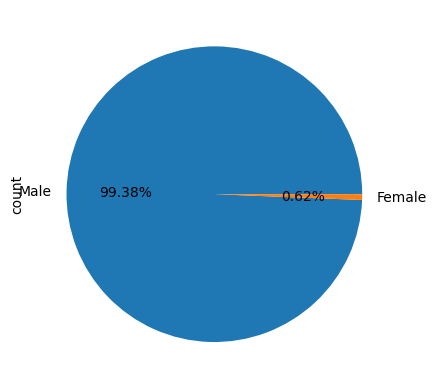

In [78]:
GenderGt30AndWeightGte90['Gender'].value_counts().plot.pie(autopct='%0.2f%%')
show()

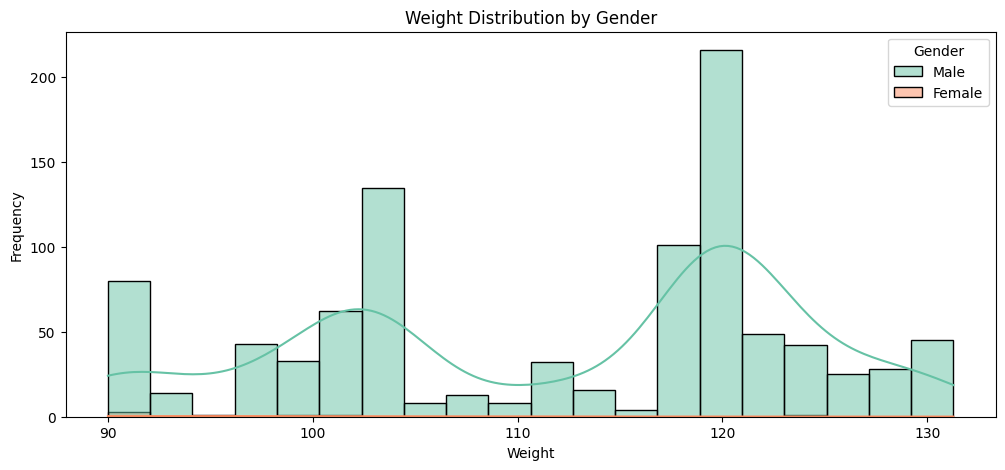

In [79]:
figure(figsize=(12, 5))
histplot(data=GenderGt30AndWeightGte90,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set2')
title('Weight Distribution by Gender')
xlabel('Weight')
ylabel('Frequency')
show()

----------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90**

In [80]:
GenderLte30AndWeightGte90 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) , (['Age','Gender','Weight'])]

In [81]:
GenderLte30AndWeightGte90['Age'].value_counts()

Age
26    2860
23     849
21     833
22     630
25     517
24     505
18     454
27     303
30     291
19     215
20     202
28     144
29     116
17      66
16       1
Name: count, dtype: int64

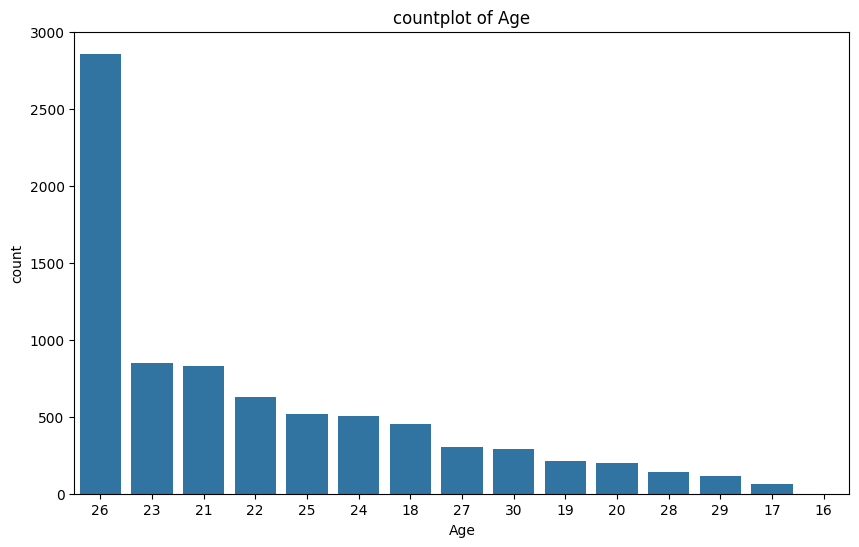

In [82]:
figure(figsize=(10, 6))
countplot(data = GenderLte30AndWeightGte90, x = 'Age', order = GenderLte30AndWeightGte90['Age'].value_counts().index)
title('countplot of Age')
show()

In [83]:
GenderLte30AndWeightGte90['Gender'].value_counts()

Gender
Female    4151
Male      3835
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\1799672119.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90, palette=['green','red'])


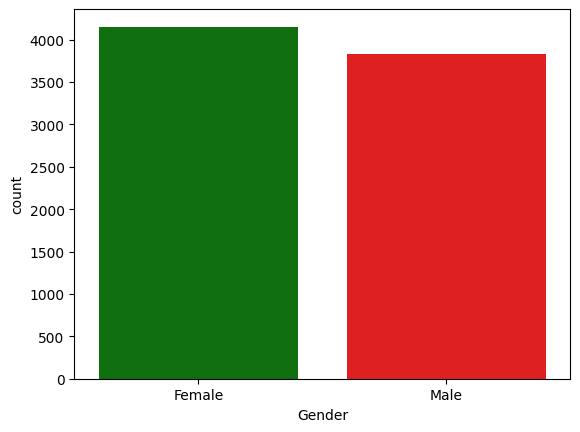

In [84]:
countplot(x='Gender', data=GenderLte30AndWeightGte90, palette=['green','red'])
xlabel('Gender')
show()

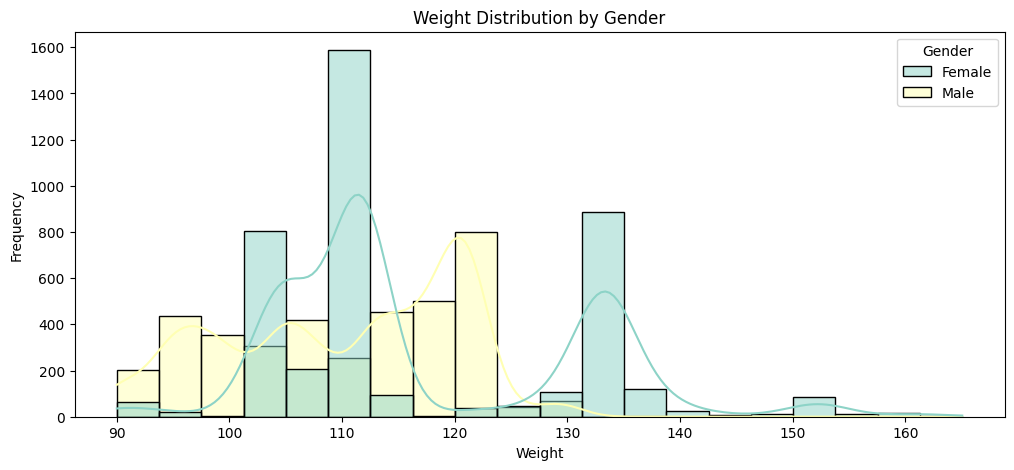

In [85]:
figure(figsize=(12, 5))
histplot(data=GenderLte30AndWeightGte90,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set3')
title('Weight Distribution by Gender')
xlabel('Weight')
ylabel('Frequency')
show()

------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Means of transportation used = Public_Transportation** or **Automobile**

In [86]:
GenderGt30AndWeightGte90AndMeansTrans1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Public_Transportation') | (train_df['Means of transportation used'] == 'Automobile')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [87]:
GenderGt30AndWeightGte90AndMeansTrans1

,Age,Gender,Weight,Means of transportation used
4,32,Male,93.798055,Public_Transportation
46,31,Male,120.998266,Public_Transportation
102,31,Male,122.813033,Public_Transportation
103,32,Male,90.000000,Automobile
203,35,Female,90.000000,Automobile
...,...,...,...,...
20583,34,Male,91.059595,Automobile
20598,31,Male,112.277567,Automobile
20635,31,Male,120.919703,Automobile
20710,34,Male,102.134646,Automobile


In [88]:
GenderGt30AndWeightGte90AndMeansTrans1['Gender'].value_counts()

Gender
Male      949
Female      6
Name: count, dtype: int64

In [89]:
GenderGt30AndWeightGte90AndMeansTrans1['Means of transportation used'].value_counts()

Means of transportation used
Automobile               562
Public_Transportation    393
Name: count, dtype: int64

-------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Means of transportation used = Walking** or **Bike** or **Motorbike**

In [90]:
GenderGt30AndWeightGte90AndMeansTrans2 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Walking') | (train_df['Means of transportation used'] == 'Bike') | (train_df['Means of transportation used'] == 'Motorbike')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [91]:
GenderGt30AndWeightGte90AndMeansTrans2

,Age,Gender,Weight,Means of transportation used
3533,33,Male,91.0,Walking
4429,33,Male,97.0,Walking
17672,33,Male,91.0,Walking
17867,33,Male,113.0,Walking
18248,33,Male,97.0,Walking
18835,33,Male,103.0,Walking


----------------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Means of transportation used = Public_Transportation** or **Automobile**

In [92]:
GenderLte30AndWeightGtet90AndMeansTrans1 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Public_Transportation') | (train_df['Means of transportation used'] == 'Automobile')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [93]:
GenderLte30AndWeightGtet90AndMeansTrans1

,Age,Gender,Weight,Means of transportation used
3,21,Female,131.274851,Public_Transportation
6,30,Male,112.725005,Automobile
7,30,Male,118.206565,Automobile
9,26,Female,111.275646,Public_Transportation
12,18,Male,108.251044,Public_Transportation
...,...,...,...,...
20749,26,Female,104.835346,Public_Transportation
20751,21,Female,133.466763,Public_Transportation
20753,25,Male,114.187096,Public_Transportation
20755,20,Male,105.580491,Public_Transportation


In [94]:
GenderLte30AndWeightGtet90AndMeansTrans1['Gender'].value_counts()

Gender
Female    4151
Male      3792
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\2193786380.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])


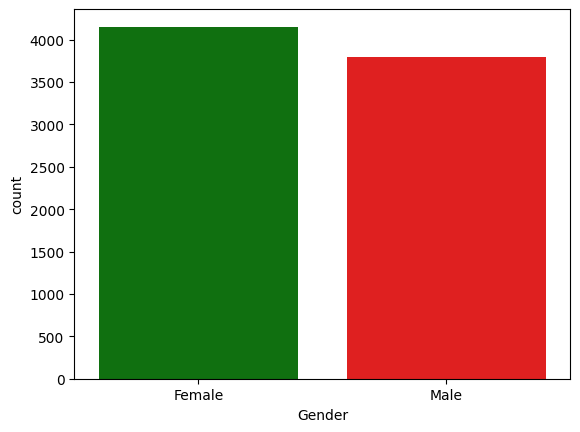

In [95]:
countplot(x='Gender', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])
xlabel('Gender')
show()

In [96]:
GenderLte30AndWeightGtet90AndMeansTrans1['Means of transportation used'].value_counts()

Means of transportation used
Public_Transportation    7449
Automobile                494
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\566136229.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Means of transportation used', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])


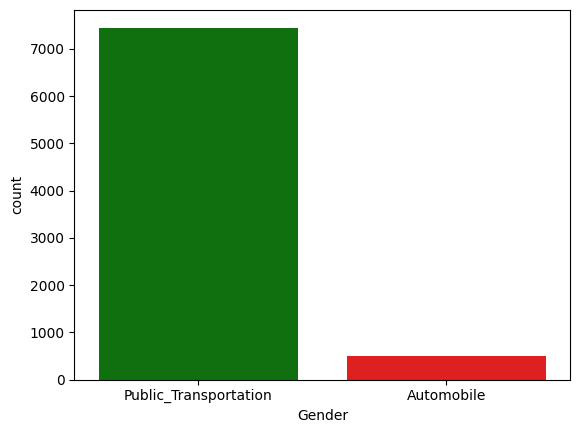

In [97]:
countplot(x='Means of transportation used', data=GenderLte30AndWeightGtet90AndMeansTrans1, palette=['green','red'])
xlabel('Gender')
show()

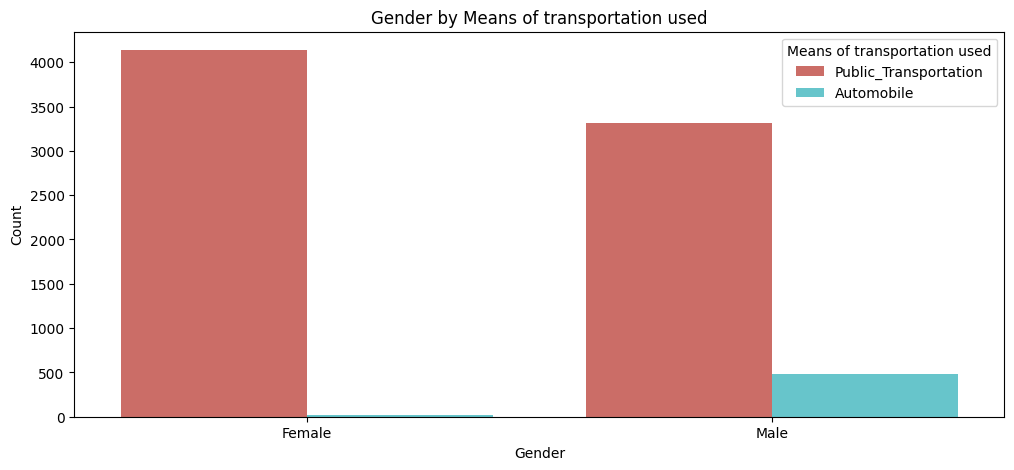

In [98]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGtet90AndMeansTrans1, x='Gender', hue='Means of transportation used', palette="hls")
title('Gender by Means of transportation used')
xlabel('Gender')
ylabel('Count')
show()

---------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Means of transportation used = Walking** or **Bike** or **Motorbike**

In [99]:
GenderLte30AndWeightGte90AndMeansTrans2 = train_df.loc[(train_df['Age'] < 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Means of transportation used'] == 'Walking') | (train_df['Means of transportation used'] == 'Bike') | (train_df['Means of transportation used'] == 'Motorbike')) , 
             (['Age','Gender','Weight','Means of transportation used'])]

In [100]:
GenderLte30AndWeightGte90AndMeansTrans2

,Age,Gender,Weight,Means of transportation used
639,17,Male,98.000000,Walking
950,26,Male,90.000000,Walking
1288,17,Male,113.000000,Walking
1477,17,Male,97.000000,Walking
1641,17,Male,97.000000,Walking
2285,23,Male,95.000000,Walking
3482,24,Male,90.000000,Walking
3886,23,Male,105.000000,Walking
5020,23,Male,97.000000,Walking
5621,21,Male,96.000000,Motorbike


In [101]:
GenderLte30AndWeightGte90AndMeansTrans2['Gender'].value_counts()

Gender
Male    43
Name: count, dtype: int64

In [102]:
GenderLte30AndWeightGte90AndMeansTrans2['Means of transportation used'].value_counts()

Means of transportation used
Walking      38
Motorbike     4
Bike          1
Name: count, dtype: int64

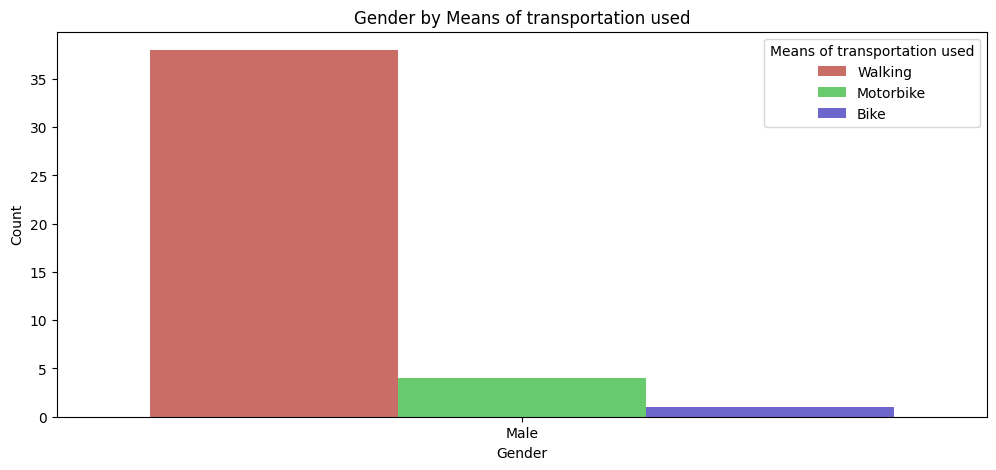

In [103]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndMeansTrans2, x='Gender', hue='Means of transportation used', palette="hls")
title('Gender by Means of transportation used')
xlabel('Gender')
ylabel('Count')
show()

--------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Number of main meals the person eats per day = 3** or **4** 

In [104]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Number of main meals the person eats per day'] == 3) | (train_df['Number of main meals the person eats per day'] == 4)) , 
             (['Age','Gender','Weight','Number of main meals the person eats per day'])]

In [105]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1

,Age,Gender,Weight,Number of main meals the person eats per day
46,31,Male,120.998266,3
102,31,Male,122.813033,3
203,35,Female,90.000000,3
206,32,Male,120.158049,3
208,32,Male,119.441207,3
...,...,...,...,...
20553,32,Male,128.114161,3
20583,34,Male,91.059595,3
20598,31,Male,112.277567,3
20635,31,Male,120.919703,3


In [106]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1['Gender'].value_counts()

Gender
Male      756
Female      4
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\1549736959.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, palette=['green','red'])


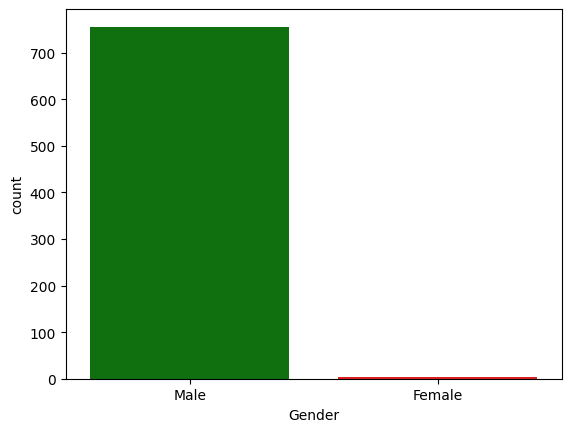

In [107]:
countplot(x='Gender', data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, palette=['green','red'])
xlabel('Gender')
show()

In [108]:
GenderGt30AndWeightGte90AndNumberMealsPerDay1['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3    754
4      6
Name: count, dtype: int64

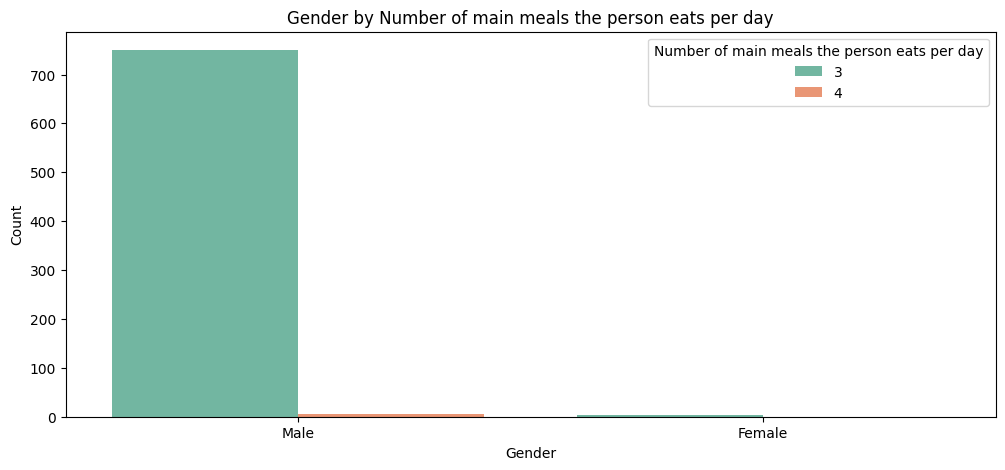

In [109]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndNumberMealsPerDay1, x='Gender', hue='Number of main meals the person eats per day', palette="Set2")
title('Gender by Number of main meals the person eats per day')
xlabel('Gender')
ylabel('Count')
show()

-----------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Number of main meals the person eats per day = 3** or **4** 

In [110]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Number of main meals the person eats per day'] == 3) | (train_df['Number of main meals the person eats per day'] == 4)) , 
             (['Age','Gender','Weight','Number of main meals the person eats per day'])]

In [111]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2

,Age,Gender,Weight,Number of main meals the person eats per day
3,21,Female,131.274851,3
6,30,Male,112.725005,3
7,30,Male,118.206565,3
9,26,Female,111.275646,3
13,21,Female,131.529267,3
...,...,...,...,...
20749,26,Female,104.835346,3
20751,21,Female,133.466763,3
20753,25,Male,114.187096,3
20755,20,Male,105.580491,3


In [112]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2['Gender'].value_counts()

Gender
Female    4134
Male      3242
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\1141836588.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, palette=['green','red'])


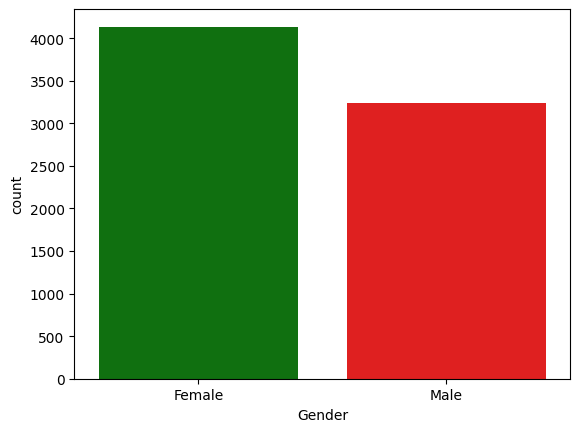

In [113]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, palette=['green','red'])
xlabel('Gender')
show()

In [114]:
GenderLte30AndWeightGte90AndNumberMealsPerDay2['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3    7355
4      21
Name: count, dtype: int64

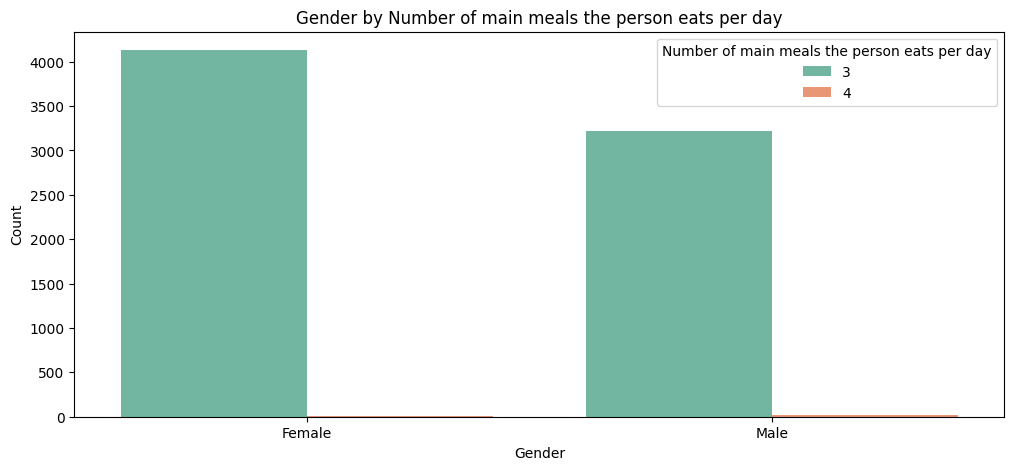

In [115]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndNumberMealsPerDay2, x='Gender', hue='Number of main meals the person eats per day', palette="Set2")
title('Gender by Number of main meals the person eats per day')
xlabel('Gender')
ylabel('Count')
show()

--------------------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Physical activity frequency Classes = No physical activity** or **Very low activity** 

In [116]:
GenderGt30AndWeightGte90AndPhysicalActivity1 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'No physical activity') | (train_df['Physical activity frequency Classes'] == 'Very low activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [117]:
GenderGt30AndWeightGte90AndPhysicalActivity1

,Age,Gender,Weight,Physical activity frequency Classes
4,32,Male,93.798055,Very low activity
46,31,Male,120.998266,Very low activity
102,31,Male,122.813033,No physical activity
103,32,Male,90.000000,Very low activity
203,35,Female,90.000000,Very low activity
...,...,...,...,...
20547,31,Male,118.424156,No physical activity
20553,32,Male,128.114161,No physical activity
20598,31,Male,112.277567,No physical activity
20635,31,Male,120.919703,No physical activity


In [118]:
GenderGt30AndWeightGte90AndPhysicalActivity1['Gender'].value_counts()

Gender
Male      926
Female      6
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\3618581145.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderGt30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])


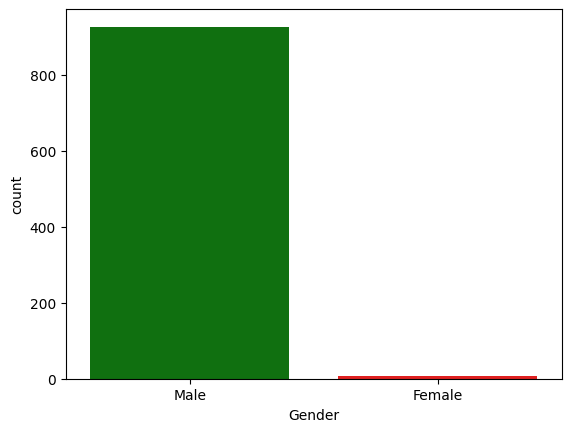

In [119]:
countplot(x='Gender', data=GenderGt30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])
xlabel('Gender')
show()

In [120]:
GenderGt30AndWeightGte90AndPhysicalActivity1['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity    494
Very low activity       438
Name: count, dtype: int64

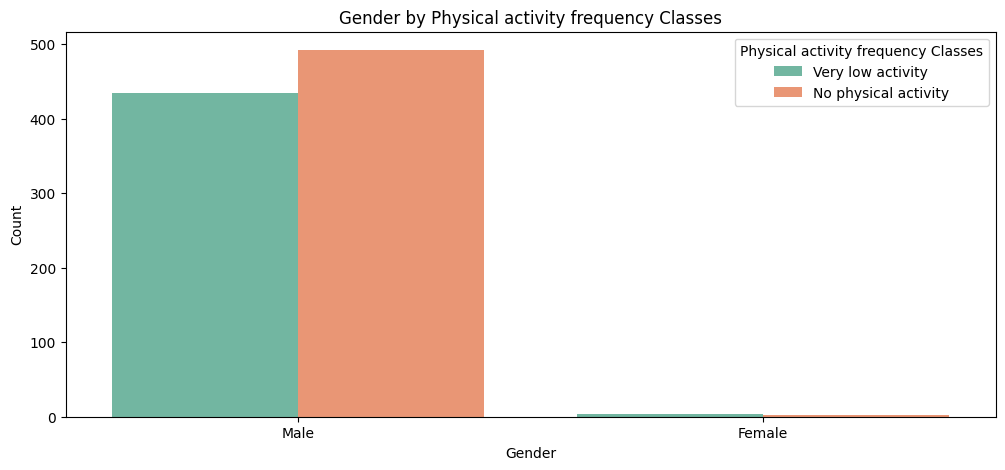

In [121]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndPhysicalActivity1, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

--------------------------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Physical activity frequency Classes = No physical activity** or **Very low activity** 

In [122]:
GenderLte30AndWeightGte90AndPhysicalActivity1 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'No physical activity') | (train_df['Physical activity frequency Classes'] == 'Very low activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [123]:
GenderLte30AndWeightGte90AndPhysicalActivity1

,Age,Gender,Weight,Physical activity frequency Classes
3,21,Female,131.274851,Very low activity
6,30,Male,112.725005,No physical activity
7,30,Male,118.206565,No physical activity
9,26,Female,111.275646,No physical activity
12,18,Male,108.251044,Very low activity
...,...,...,...,...
20749,26,Female,104.835346,No physical activity
20751,21,Female,133.466763,Very low activity
20753,25,Male,114.187096,Very low activity
20755,20,Male,105.580491,Very low activity


In [124]:
GenderLte30AndWeightGte90AndPhysicalActivity1['Gender'].value_counts()

Gender
Female    4133
Male      3422
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\3827297360.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])


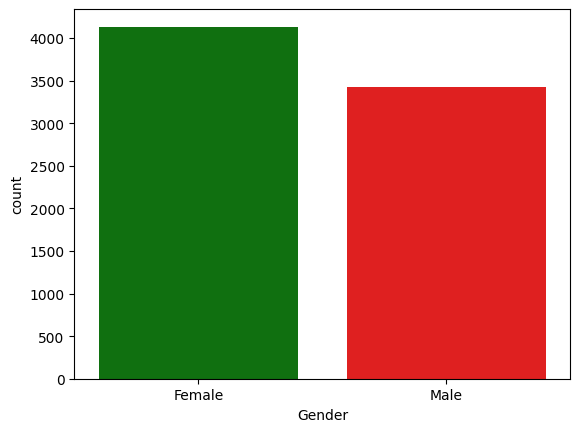

In [125]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity1, palette=['green','red'])
xlabel('Gender')
show()

In [126]:
GenderLte30AndWeightGte90AndPhysicalActivity1['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity    4351
Very low activity       3204
Name: count, dtype: int64

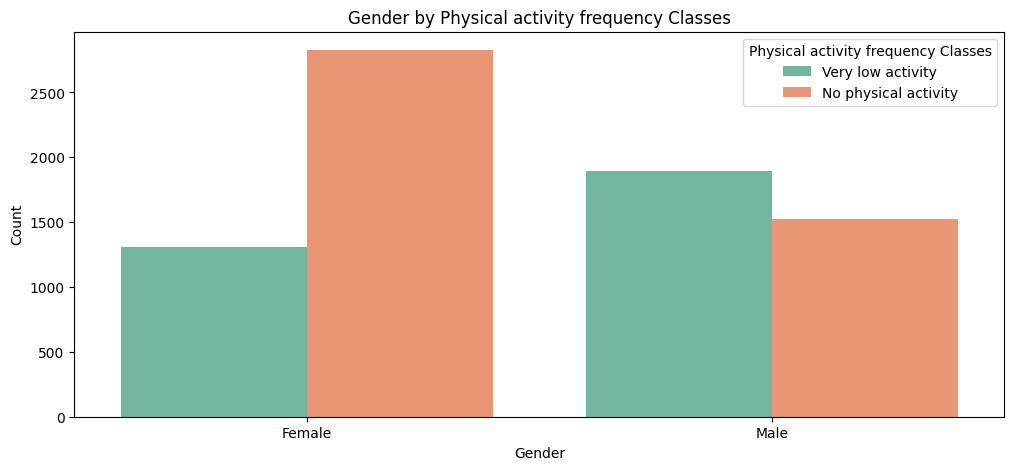

In [127]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndPhysicalActivity1, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

--------------------------------------

- ##### **Gender** with **Age > 30** and **Weight >= 90** and **Physical activity frequency Classes = Low to moderate activity** or **Moderate activity** 

In [128]:
GenderGt30AndWeightGte90AndPhysicalActivity2 = train_df.loc[(train_df['Age'] > 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'Low to moderate activity') | (train_df['Physical activity frequency Classes'] == 'Moderate activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [129]:
GenderGt30AndWeightGte90AndPhysicalActivity2

,Age,Gender,Weight,Physical activity frequency Classes
460,33,Male,97.000000,Low to moderate activity
2612,34,Male,90.000000,Low to moderate activity
3547,33,Male,97.000000,Low to moderate activity
4438,34,Male,120.000000,Low to moderate activity
5920,32,Male,102.781971,Low to moderate activity
5923,34,Male,98.790167,Low to moderate activity
6454,33,Male,97.813023,Low to moderate activity
6460,33,Male,97.544696,Low to moderate activity
7186,33,Male,97.592949,Low to moderate activity
7474,33,Male,97.000000,Moderate activity


In [130]:
GenderGt30AndWeightGte90AndPhysicalActivity2['Gender'].value_counts()

Gender
Male    29
Name: count, dtype: int64

In [131]:
GenderGt30AndWeightGte90AndPhysicalActivity2['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
Low to moderate activity    27
Moderate activity            2
Name: count, dtype: int64

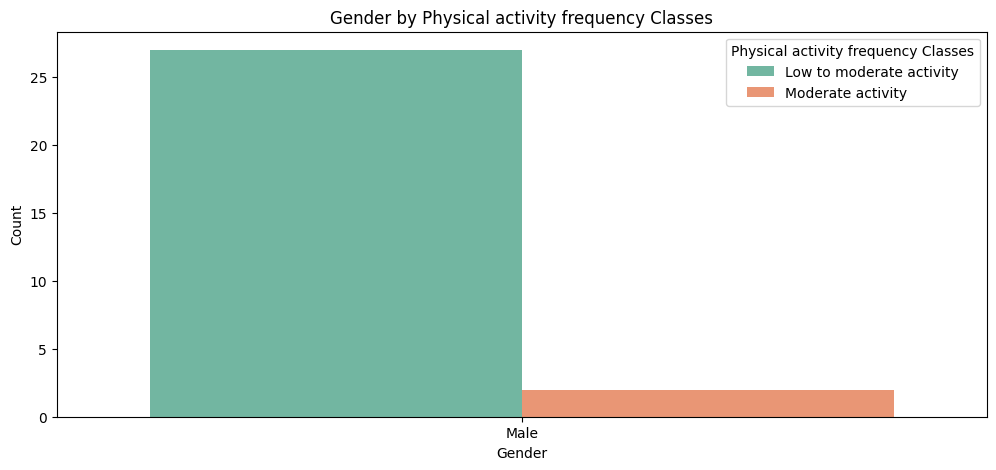

In [132]:
figure(figsize=(12,	5))
countplot(data=GenderGt30AndWeightGte90AndPhysicalActivity2, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

--------------------------------------

- ##### **Gender** with **Age <= 30** and **Weight >= 90** and **Physical activity frequency Classes = Low to moderate activity** or **Moderate activity** 

In [133]:
GenderLte30AndWeightGte90AndPhysicalActivity2 = train_df.loc[(train_df['Age'] <= 30) & (train_df['Weight'] >= 90) & 
             ((train_df['Physical activity frequency Classes'] == 'Low to moderate activity') | (train_df['Physical activity frequency Classes'] == 'Moderate activity')) , 
             (['Age','Gender','Weight','Physical activity frequency Classes'])]

In [134]:
GenderLte30AndWeightGte90AndPhysicalActivity2

,Age,Gender,Weight,Physical activity frequency Classes
31,23,Male,97.000000,Moderate activity
79,22,Male,105.000000,Low to moderate activity
99,18,Male,95.000000,Low to moderate activity
110,22,Male,95.000000,Moderate activity
143,20,Male,105.025808,Low to moderate activity
...,...,...,...,...
20550,26,Male,103.000000,Moderate activity
20614,18,Male,90.000000,Low to moderate activity
20713,25,Male,114.000000,Low to moderate activity
20729,22,Male,98.447311,Low to moderate activity


In [135]:
GenderLte30AndWeightGte90AndPhysicalActivity2['Gender'].value_counts()

Gender
Male      413
Female     18
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\198168235.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity2, palette=['green','red'])


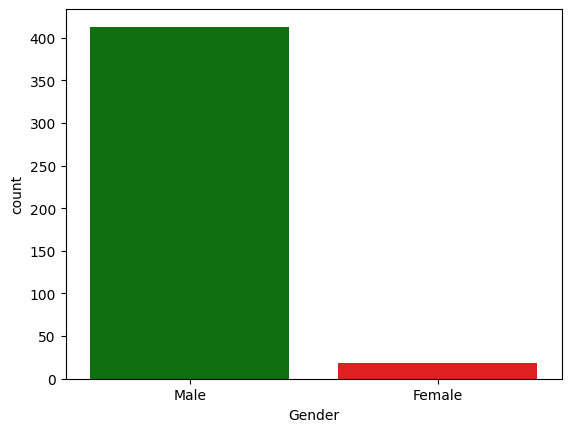

In [136]:
countplot(x='Gender', data=GenderLte30AndWeightGte90AndPhysicalActivity2, palette=['green','red'])
xlabel('Gender')
show()

In [137]:
GenderLte30AndWeightGte90AndPhysicalActivity2['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
Low to moderate activity    288
Moderate activity           143
Name: count, dtype: int64

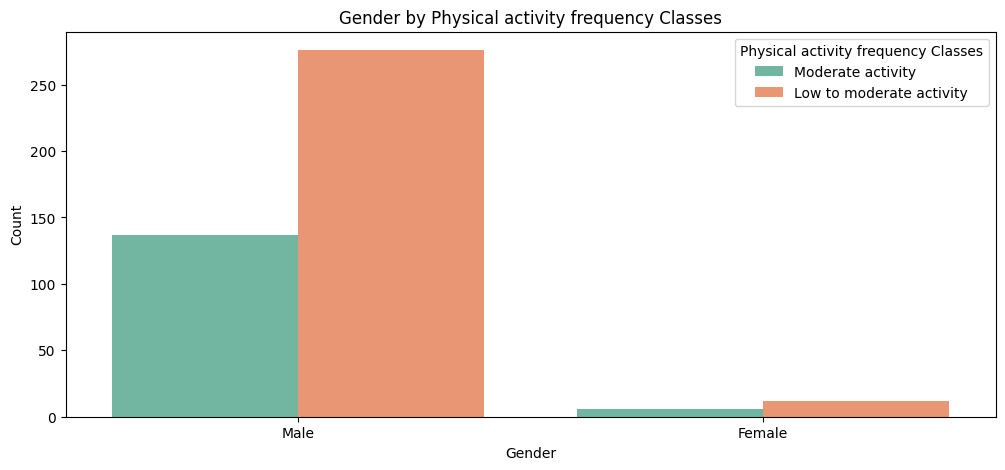

In [138]:
figure(figsize=(12,	5))
countplot(data=GenderLte30AndWeightGte90AndPhysicalActivity2, x='Gender', hue='Physical activity frequency Classes', palette="Set2")
title('Gender by Physical activity frequency Classes')
xlabel('Gender')
ylabel('Count')
show()

------------------------
-----------------------

## **Transform Data**

-----------------------

In [139]:
object_train_data = train_df.select_dtypes(include='object')
non_object_train_data = train_df.select_dtypes(exclude='object')

In [140]:
object_test_data = train_df.select_dtypes(include='object')
non_object_test_data = train_df.select_dtypes(exclude='object')

In [141]:
object_train_data

,Gender,Family history with overweight,Frequent consumption of high-caloric food,Consumption of food between meals,SMOKE,Whether the person takes calorie supplements,Alcohol consumption,Means of transportation used,Obesity level class,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes,Time spent using technology Classes
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,No physical activity,Very low screen time
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight,Sometimes consumes vegetables,One meal per day,Low water intake,No physical activity,Very low screen time
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,Regularly consumes vegetables,Three meals per day,Low water intake,Very low activity,Very low screen time
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Low water intake,Very low activity,Very low screen time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_II,Regularly consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
20754,Male,no,yes,Frequently,no,no,Sometimes,Public_Transportation,Insufficient_Weight,Regularly consumes vegetables,More than three meals,Low water intake,Low to moderate activity,Very low screen time
20755,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
20756,Male,yes,yes,Sometimes,no,no,no,Automobile,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Moderate water intake,No physical activity,Very low screen time


In [142]:
for col in object_train_data.columns:
    if object_train_data[col].nunique() == 2  :
        print(f'{col} : {object_train_data[col].nunique()}')

Gender : 2
Family history with overweight : 2
Frequent consumption of high-caloric food : 2
SMOKE : 2
Whether the person takes calorie supplements : 2
Time spent using technology Classes : 2


In [143]:
object_train_data_with_2_uniques = object_train_data[['Gender','Family history with overweight','Frequent consumption of high-caloric food','SMOKE',
                                                      'Whether the person takes calorie supplements','Time spent using technology Classes']]

In [144]:
label = LabelEncoder()
for col in range(0,object_train_data_with_2_uniques.shape[1]):
    object_train_data_with_2_uniques.iloc[:,col] = label.fit_transform(object_train_data_with_2_uniques.iloc[:,col])
object_train_data_with_2_uniques = object_train_data_with_2_uniques.astype(int)

In [145]:
object_train_data_with_2_uniques

,Gender,Family history with overweight,Frequent consumption of high-caloric food,SMOKE,Whether the person takes calorie supplements,Time spent using technology Classes
0,1,1,1,0,0,1
1,0,1,1,0,0,1
2,0,1,1,0,0,1
3,0,1,1,0,0,1
4,1,1,1,0,0,1
...,...,...,...,...,...,...
20753,1,1,1,0,0,1
20754,1,0,1,0,0,1
20755,1,1,1,0,0,1
20756,1,1,1,0,0,1


In [146]:
object_train_data_with_2_uniques.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19729 entries, 0 to 20757
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Gender                                        19729 non-null  int32
 1   Family history with overweight                19729 non-null  int32
 2   Frequent consumption of high-caloric food     19729 non-null  int32
 3   SMOKE                                         19729 non-null  int32
 4   Whether the person takes calorie supplements  19729 non-null  int32
 5   Time spent using technology Classes           19729 non-null  int32
dtypes: int32(6)
memory usage: 616.5 KB


In [147]:
# # saving label
# with open('label.pkl' , 'wb') as f :
#     dump(label, f)

-------------------------

In [148]:
for col in object_train_data.columns:
    if object_train_data[col].nunique()  > 2 :
        print(f'{col} : {object_train_data[col].nunique()}')

Consumption of food between meals : 4
Alcohol consumption : 3
Means of transportation used : 5
Obesity level class : 7
Frequency of vegetable consumption Classes : 3
Number of main meals the person eats per day Classes : 4
Daily water consumption Classes : 3
Physical activity frequency Classes : 4


In [149]:
object_train_data_Gt_2_nuniques = object_train_data[['Consumption of food between meals','Alcohol consumption','Means of transportation used','Obesity level class','Frequency of vegetable consumption Classes','Number of main meals the person eats per day Classes','Daily water consumption Classes','Physical activity frequency Classes']]

In [150]:
object_train_data_Gt_2_nuniques

,Consumption of food between meals,Alcohol consumption,Means of transportation used,Obesity level class,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes
0,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,No physical activity
1,Frequently,no,Automobile,Normal_Weight,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity
2,Sometimes,no,Public_Transportation,Insufficient_Weight,Sometimes consumes vegetables,One meal per day,Low water intake,No physical activity
3,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III,Regularly consumes vegetables,Three meals per day,Low water intake,Very low activity
4,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Low water intake,Very low activity
...,...,...,...,...,...,...,...,...
20753,Sometimes,Sometimes,Public_Transportation,Obesity_Type_II,Regularly consumes vegetables,Three meals per day,Moderate water intake,Very low activity
20754,Frequently,Sometimes,Public_Transportation,Insufficient_Weight,Regularly consumes vegetables,More than three meals,Low water intake,Low to moderate activity
20755,Sometimes,no,Public_Transportation,Obesity_Type_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity
20756,Sometimes,no,Automobile,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Moderate water intake,No physical activity


--------------------------

In [151]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].value_counts()

Frequency of vegetable consumption Classes
Regularly consumes vegetables    9783
Sometimes consumes vegetables    9196
Rarely consumes vegetables        750
Name: count, dtype: int64

In [152]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Rarely consumes vegetables',0)
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Sometimes consumes vegetables',1)
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Regularly consumes vegetables',2)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\160115314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].replace('Rarely consumes vegetables',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\160115314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes']= object_train_dat

In [153]:
object_train_data_Gt_2_nuniques['Frequency of vegetable consumption Classes'].value_counts()


Frequency of vegetable consumption Classes
2    9783
1    9196
0     750
Name: count, dtype: int64

------------------------

In [154]:
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
Three meals per day      15521
One meal per day          2357
More than three meals     1030
Two meals per day          821
Name: count, dtype: int64

In [155]:

object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('One meal per day',0)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('Two meals per day',1)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('Three meals per day',2)
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('More than three meals',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\1069382970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes']= object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].replace('One meal per day',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\1069382970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Class

In [156]:
object_train_data_Gt_2_nuniques['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
2    15521
0     2357
3     1030
1      821
Name: count, dtype: int64

--------------------------------

In [157]:
object_train_data_Gt_2_nuniques['Daily water consumption Classes'].value_counts()

Daily water consumption Classes
Moderate water intake    12601
Low water intake          5599
High water intake         1529
Name: count, dtype: int64

In [158]:

object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Low water intake',0)
object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Moderate water intake',1)
object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('High water intake',2)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\4278355402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption Classes'].replace('Low water intake',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\4278355402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Daily water consumption Classes']= object_train_data_Gt_2_nuniques['Daily water consumption 

In [159]:
object_train_data_Gt_2_nuniques['Daily water consumption Classes'].value_counts()


Daily water consumption Classes
1    12601
0     5599
2     1529
Name: count, dtype: int64

----------------------------------------

In [160]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity        8514
Very low activity           7657
Low to moderate activity    2784
Moderate activity            774
Name: count, dtype: int64

In [161]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('No physical activity',0)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Very low activity',1)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Low to moderate activity',2)
object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('Moderate activity',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\1857606638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].replace('No physical activity',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\1857606638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Physical activity frequency Classes']= object_train_data_Gt_2_nuniques['Physical

In [162]:
object_train_data_Gt_2_nuniques['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
0    8514
1    7657
2    2784
3     774
Name: count, dtype: int64

---------------------------

In [163]:
object_train_data_Gt_2_nuniques['Consumption of food between meals'].value_counts()

Consumption of food between meals
Sometimes     16566
Frequently     2425
Always          460
no              278
Name: count, dtype: int64

In [164]:
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('no',0)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Sometimes',1)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Frequently',2)
object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('Always',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\3469034432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meals'].replace('no',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\3469034432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Consumption of food between meals']= object_train_data_Gt_2_nuniques['Consumption of food between meal

In [165]:
object_train_data_Gt_2_nuniques['Consumption of food between meals'].value_counts()

Consumption of food between meals
1    16566
2     2425
3      460
0      278
Name: count, dtype: int64

-------------------------

In [166]:
object_train_data_Gt_2_nuniques['Alcohol consumption'].value_counts()


Alcohol consumption
Sometimes     14386
no             4872
Frequently      471
Name: count, dtype: int64

In [167]:
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('no',0)
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Sometimes',1)
object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Frequently',2)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\1355582882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('no',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\1355582882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Alcohol consumption']= object_train_data_Gt_2_nuniques['Alcohol consumption'].replace('Sometimes',1)
C:\Users\RPC\AppData\Local\Te

In [168]:
object_train_data_Gt_2_nuniques['Alcohol consumption'].value_counts()

Alcohol consumption
1    14386
0     4872
2      471
Name: count, dtype: int64

------------------------------

In [169]:
object_train_data_Gt_2_nuniques['Means of transportation used'].value_counts()

Means of transportation used
Public_Transportation    16669
Automobile                2537
Walking                    461
Motorbike                   32
Bike                        30
Name: count, dtype: int64

In [170]:
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Public_Transportation',0)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Automobile',1)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Walking',2)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Motorbike',3)
object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Bike',4)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\671721201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used'].replace('Public_Transportation',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\671721201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Means of transportation used']= object_train_data_Gt_2_nuniques['Means of transportation used']

In [171]:
object_train_data_Gt_2_nuniques['Means of transportation used'].value_counts()

Means of transportation used
0    16669
1     2537
2      461
3       32
4       30
Name: count, dtype: int64

----------------------

In [172]:
object_train_data_Gt_2_nuniques['Obesity level class'].value_counts()

Obesity level class
Obesity_Type_III       4046
Obesity_Type_II        3067
Normal_Weight          3062
Insufficient_Weight    2516
Obesity_Type_I         2425
Overweight_Level_II    2325
Overweight_Level_I     2288
Name: count, dtype: int64

In [173]:
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Insufficient_Weight',0)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Normal_Weight',1)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Overweight_Level_I',2)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Overweight_Level_II',3)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_I',4)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_II',5)
object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Obesity_Type_III',6)

C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\3380256162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Insufficient_Weight',0)
C:\Users\RPC\AppData\Local\Temp\ipykernel_14220\3380256162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_train_data_Gt_2_nuniques['Obesity level class'] = object_train_data_Gt_2_nuniques['Obesity level class'].replace('Normal_Weight',1)
C:\Use

In [174]:
object_train_data_Gt_2_nuniques['Obesity level class'].value_counts()

Obesity level class
6    4046
5    3067
1    3062
0    2516
4    2425
3    2325
2    2288
Name: count, dtype: int64

---------------------

In [175]:
df=concat([non_object_train_data, object_train_data_with_2_uniques, object_train_data_Gt_2_nuniques],axis=1)

In [176]:
df

,Age,Height,Weight,Frequency of vegetable consumption,Number of main meals the person eats per day,Daily water consumption,Physical activity frequency,Time spent using technology,Gender,Family history with overweight,...,Whether the person takes calorie supplements,Time spent using technology Classes,Consumption of food between meals,Alcohol consumption,Means of transportation used,Obesity level class,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes
0,24,1.699998,81.669950,2,3,2.763573,0.000000,0.976473,1,1,...,0,1,1,1,0,3,1,2,1,0
1,18,1.560000,57.000000,2,3,2.000000,1.000000,1.000000,0,1,...,0,1,2,0,1,1,1,2,1,1
2,18,1.711460,50.165754,2,1,1.910378,0.866045,1.673584,0,1,...,0,1,1,0,0,0,1,0,0,0
3,21,1.710730,131.274851,3,3,1.674061,1.467863,0.780199,0,1,...,0,1,1,1,0,6,2,2,0,1
4,32,1.914186,93.798055,3,2,1.979848,1.967973,0.931721,1,1,...,0,1,1,1,0,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25,1.766626,114.187096,3,3,2.151809,1.330519,0.196680,1,1,...,0,1,1,1,0,5,2,2,1,1
20754,18,1.710000,50.000000,3,4,1.000000,2.000000,1.000000,1,0,...,0,1,2,1,0,0,2,3,0,2
20755,20,1.819557,105.580491,2,3,2.000000,1.158040,1.198439,1,1,...,0,1,1,0,0,5,1,2,1,1
20756,34,1.700000,83.520113,3,2,2.144838,0.000000,0.973834,1,1,...,0,1,1,0,1,3,2,1,1,0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19729 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Age                                                   19729 non-null  int64  
 1   Height                                                19729 non-null  float64
 2   Weight                                                19729 non-null  float64
 3   Frequency of vegetable consumption                    19729 non-null  int64  
 4   Number of main meals the person eats per day          19729 non-null  int32  
 5   Daily water consumption                               19729 non-null  float64
 6   Physical activity frequency                           19729 non-null  float64
 7   Time spent using technology                           19729 non-null  float64
 8   Gender                                                19729 n

--------------------------
--------------------------
-------------------------

## **Model**

---------------------

### **Spliting Data**

In [178]:
x = df.drop(['Obesity level class'],axis=1)
y = df['Obesity level class']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1234)

In [179]:
print(f'x_train : {x_train.shape}   ,   x_test : {x_test.shape}')
print(f'y_train : {y_train.shape}   ,   y_test : {y_test.shape}')

x_train : (15783, 21)   ,   x_test : (3946, 21)
y_train : (15783,)   ,   y_test : (3946,)


----------------

### **Feature Scaling**

In [180]:
scaler = StandardScaler()

x_train[['Age','Weight']] = scaler.fit_transform(x_train[['Age','Weight']])
x_test[['Age','Weight']] = scaler.fit_transform(x_test[['Age','Weight']])

In [181]:
x_train

,Age,Height,Weight,Frequency of vegetable consumption,Number of main meals the person eats per day,Daily water consumption,Physical activity frequency,Time spent using technology,Gender,Family history with overweight,...,SMOKE,Whether the person takes calorie supplements,Time spent using technology Classes,Consumption of food between meals,Alcohol consumption,Means of transportation used,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes
12619,0.714914,1.635062,0.853249,3,3,1.184230,0.000000,0.436068,0,1,...,0,0,1,1,1,0,2,2,0,0
10036,-0.464257,1.580000,-1.160054,2,1,2.000000,0.000000,1.000000,0,1,...,0,0,1,1,0,0,1,0,1,0
20259,-0.700091,1.700000,-1.421374,2,3,1.000000,0.000000,2.000000,1,0,...,0,0,0,3,0,0,1,2,0,0
10652,-0.700091,1.660840,-1.457220,3,3,2.000000,0.000000,1.000000,0,0,...,0,0,1,2,1,0,2,2,1,0
11419,0.007411,1.755938,1.187397,2,3,2.174371,1.251665,0.840911,1,1,...,0,0,1,1,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8664,0.007411,1.859927,1.248845,3,3,1.797161,0.899864,1.898139,1,1,...,0,0,1,1,1,0,2,2,0,0
9959,1.894084,1.810215,1.381390,2,3,1.662117,0.992371,0.500936,1,1,...,1,0,1,1,1,0,1,2,0,0
8933,0.007411,1.707557,-0.466544,2,4,2.078297,0.774646,1.944177,1,1,...,0,0,1,1,1,0,1,3,1,0
17929,-0.935925,1.800000,-1.048060,2,3,2.000000,2.000000,1.000000,1,0,...,0,0,1,1,0,0,1,2,1,2


In [182]:
# # saving scaling 
# with open('scaler.pkl' , 'wb') as f :
#     dump(scaler, f)

----------------------

## **Creating Model with ML algorithms for multi-class** 

In [203]:
models = [
    LogisticRegression(multi_class='multinomial', max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(decision_function_shape='ovr'),
]

In [204]:
def MultiClass(model):
    print(f"🔹 Model: {model}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [185]:
MultiClass(models[0])

🔹 Model: LogisticRegression(max_iter=1000, multi_class='multinomial')


C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       520
           1       0.81      0.85      0.83       608
           2       0.71      0.70      0.70       443
           3       0.70      0.67      0.68       488
           4       0.80      0.80      0.80       454
           5       0.93      0.96      0.95       625
           6       1.00      1.00      1.00       808

    accuracy                           0.86      3946
   macro avg       0.84      0.84      0.84      3946
weighted avg       0.86      0.86      0.86      3946



In [186]:
MultiClass(models[1])

🔹 Model: DecisionTreeClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       520
           1       0.75      0.78      0.77       608
           2       0.63      0.64      0.63       443
           3       0.71      0.70      0.71       488
           4       0.81      0.79      0.80       454
           5       0.94      0.95      0.94       625
           6       1.00      1.00      1.00       808

    accuracy                           0.84      3946
   macro avg       0.82      0.82      0.82      3946
weighted avg       0.84      0.84      0.84      3946



In [187]:
MultiClass(models[2])

🔹 Model: RandomForestClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       520
           1       0.81      0.90      0.85       608
           2       0.79      0.74      0.77       443
           3       0.80      0.80      0.80       488
           4       0.89      0.86      0.87       454
           5       0.96      0.97      0.96       625
           6       1.00      1.00      1.00       808

    accuracy                           0.90      3946
   macro avg       0.88      0.88      0.88      3946
weighted avg       0.90      0.90      0.89      3946



In [188]:
MultiClass(models[3])

🔹 Model: KNeighborsClassifier()
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       520
           1       0.63      0.67      0.65       608
           2       0.50      0.51      0.50       443
           3       0.64      0.53      0.58       488
           4       0.73      0.68      0.70       454
           5       0.93      0.95      0.94       625
           6       1.00      1.00      1.00       808

    accuracy                           0.77      3946
   macro avg       0.74      0.74      0.74      3946
weighted avg       0.77      0.77      0.76      3946



In [189]:
MultiClass(models[4])

🔹 Model: GaussianNB()
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       520
           1       0.61      0.48      0.54       608
           2       0.58      0.35      0.43       443
           3       0.56      0.35      0.43       488
           4       0.41      0.56      0.47       454
           5       0.71      0.95      0.81       625
           6       0.94      0.99      0.97       808

    accuracy                           0.68      3946
   macro avg       0.64      0.64      0.63      3946
weighted avg       0.67      0.68      0.66      3946



In [205]:
MultiClass(models[5])

🔹 Model: SVC()
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       520
           1       0.83      0.84      0.83       608
           2       0.72      0.70      0.71       443
           3       0.70      0.71      0.70       488
           4       0.83      0.81      0.82       454
           5       0.95      0.96      0.96       625
           6       1.00      1.00      1.00       808

    accuracy                           0.87      3946
   macro avg       0.85      0.85      0.85      3946
weighted avg       0.87      0.87      0.87      3946



In [191]:
# !jupyter nbconvert --to html "Music_recommendation_system_regression.ipynb"